In [1]:
# 설치 버전 확인
import os
import pandas as pd
import geopandas as gpd
from glob import glob
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
import sys
from unicodedata import normalize
import os

print(os.getcwd())

# 맥북에서 문자열 음절단위 분리 방지
def change_nfc_all_dir(dirname):
    filenames = os.listdir(dirname)
    for filename in filenames:
        before_filename = os.path.join(dirname, filename)
        after_filename = normalize('NFC', before_filename)
        os.rename(before_filename, after_filename)
        
        if os.path.isdir(before_filename):    
            change_nfc_all_dir(before_filename)
            
change_nfc_all_dir(r'/Users/jeonjunhwi/문서/Projects') # <- 현재 Desktop 하위 폴더에 대해 모두 적용

import matplotlib.pyplot as plt
def matplotlib_plot_font():

    # plot에서 한글 폰트 깨지는 현상 해결!
    from matplotlib import font_manager, rc
    font_path = '/System/Library/Fonts/AppleSDGothicNeo.ttc'
    font = font_manager.FontProperties(fname=font_path).get_name()
    rc('font', family = font)
    
matplotlib_plot_font()

/Users/jeonjunhwi/문서/Projects/GNN_Covid


In [42]:
folders = glob('Data/행정구역별_위경도/**/**.shp', recursive=True)
metro = glob('**/**/*경기/**.shp') + glob('**/**/*서울/**.shp') + glob('**/**/*인천/**shp')
nonmetro_1 = glob('**/**/*경남/**.shp') + glob('**/**/*부산/**.shp') + glob('**/**/*경북/**.shp') + glob('**/**/*울산/**.shp') + glob('**/**/*대구/**.shp')
nonmetro_2 = glob('**/**/*전남/**.shp') + glob('**/**/*전북/**.shp') + glob('**/**/*광주/**.shp')
nonmetro_3 = glob('**/**/*세종/**.shp') + glob('**/**/*대전/**.shp') + glob('**/**/*충남/**.shp') + glob('**/**/*충북/**.shp')
nonmetro_4 = glob('**/**/*강원/**.shp')
nonmetro_5 = glob('**/**/*제주/**.shp')

tmp_df = pd.DataFrame(columns=['centroid', 'SGG_NM'])
diff_df = gpd.GeoDataFrame({})

# for i, files in enumerate(folders):
for i, files in enumerate(metro + nonmetro_1 + nonmetro_2 + nonmetro_3 + nonmetro_4 + nonmetro_5):
# for i, files in enumerate(nonmetro_3):

    # 지리 데이터 로드
    gg = gpd.read_file(files, encoding='cp949')
    gg = gg[['SGG_NM', 'geometry']]
    # 경기 구리시, 서울 중구 등으로 바꿈
    gg['SGG_NM'] = [files[33:35] + ' ' + y for y in gg['SGG_NM']]
    
    
    # if files[18:20] == '경남':
    #     print(gg[23])
    #     gg.drop(23, inplace=True)
    
    # 좌표계(Coordinate Refference System) 변경 -> 위도, 경도 기준으로 바뀜.
    lon_lat_gg = gg.to_crs(4326)
    
    if i == 0:
        lon_lat_gg_1 = lon_lat_gg
        lon_lat_gg_1['longitude'] = lon_lat_gg.centroid.x  
        lon_lat_gg_1['latitude'] = lon_lat_gg.centroid.y
        lon_lat_gg_1['centroid'] = lon_lat_gg.centroid
        
    else:
        lon_lat_gg['longitude'] = lon_lat_gg.centroid.x  
        lon_lat_gg['latitude'] = lon_lat_gg.centroid.y
        lon_lat_gg['centroid'] = lon_lat_gg.centroid

        lon_lat_gg_1 = lon_lat_gg_1.merge(lon_lat_gg, how='outer')

In [43]:
for region in ['성남시', '안산시', '수원시', '안양시', '일산|덕양', '수지|기흥|처인']:
    for i, idx in enumerate(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)].index):
        if i == 0:
            tmp = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
            
            if '수지' in region:
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 용인시' 
            elif '일산' in region:
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 고양시'  
            else:   
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
                
        else:
            tmp2 = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
            tmp = tmp.union(tmp2)
            
            # 합친후 해당 행 제거
            lon_lat_gg_1.drop(idx, inplace=True)
    # union 한 centroid를 할당
    lon_lat_gg_1['centroid'][lon_lat_gg_1['SGG_NM'].str.contains(region)] = tmp.centroid

# 서울 서울시성북구 -> 서울 성북구 로 전처리
lon_lat_gg_1['SGG_NM'] = lon_lat_gg_1['SGG_NM'].str.replace('서울시', '')

In [154]:
# 경기도에 위 지역에 대해서 전처리 필요. 시 단위로 구분하기 위함
# 성남시 분당구 -> 경기 성남시, 수원시 영통구 -> 경기 수원시


for _ in [수도권, 경상도, 전라도, 충청도]:
    
    ######################
    ### 서울 인천 경기 ###
    ######################
    for region in ['성남시', '안산시', '수원시', '안양시', '일산|덕양', '수지|기흥|처인']:
        for i, idx in enumerate(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)].index):
            if i == 0:
                tmp = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                
                if '수지' in region:
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 용인시' 
                elif '일산' in region:
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 고양시'  
                else:   
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
                    
            else:
                tmp2 = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                tmp = tmp.union(tmp2)
                
                # 합친후 해당 행 제거
                lon_lat_gg_1.drop(idx, inplace=True)
        # union 한 centroid를 할당
        lon_lat_gg_1['centroid'][lon_lat_gg_1['SGG_NM'].str.contains(region)] = tmp.centroid

    # 서울 서울시성북구 -> 서울 성북구 로 전처리
    lon_lat_gg_1['SGG_NM'] = lon_lat_gg_1['SGG_NM'].str.replace('서울시', '')
    
    #######################
    ####### 경상도 ########
    #######################
    for region in ['창원시', '포항시']:
        for i, idx in enumerate(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)].index):
            if i == 0:
                tmp = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                
                if '창원시' in region:
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경남 창원시' 
                elif '포항시' in region:
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경남 포항시'
                    
            else:
                tmp2 = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                tmp = tmp.union(tmp2)
                
                # 합친후 해당 행 제거
                lon_lat_gg_1.drop(idx, inplace=True)
        # union 한 centroid를 할당
        lon_lat_gg_1['centroid'][lon_lat_gg_1['SGG_NM'].str.contains(region)] = tmp.centroid
        
        

    #######################
    ####### 충청도 ########
    #######################
    for region in ['천안시', '세종']:
        for i, idx in enumerate(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)].index):
            if i == 0:
                tmp = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                
                if '천안시' in region:
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '충북 천안시' 
                elif '세종' in region:
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '세종 세종시'
                    
            else:
                tmp2 = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                tmp = tmp.union(tmp2)
                
                # 합친후 해당 행 제거
                lon_lat_gg_1.drop(idx, inplace=True)
        # union 한 centroid를 할당
        lon_lat_gg_1['centroid'][lon_lat_gg_1['SGG_NM'].str.contains(region)] = tmp.centroid
        
        
    #######################
    ####### 전라도 ########
    #######################
    for region in ['전주시']:
        for i, idx in enumerate(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)].index):
            if i == 0:
                tmp = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                
                if '전주시' in region:
                    lon_lat_gg_1.loc[idx, 'SGG_NM'] = '전북 전주시'
                    
            else:
                tmp2 = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
                tmp = tmp.union(tmp2)
                
                # 합친후 해당 행 제거
                lon_lat_gg_1.drop(idx, inplace=True)
        # union 한 centroid를 할당
        lon_lat_gg_1['centroid'][lon_lat_gg_1['SGG_NM'].str.contains(region)] = tmp.centroid

NameError: name '수도권' is not defined

In [44]:

# 행정구역 명 통일
gdf_tmp = lon_lat_gg_1.copy()
remove_dict = {}
remove_list = []
######################
# for region in ['상당|청원|서원|흥덕']:
for region in ['성남시', '안산시', '수원시', '안양시', '일산|덕양', '수지|기흥|처인', '창원시', '포항시', '천안시', '세종', '전주시', '상당|청원|흥덕', '서원']:
    for i, idx in enumerate(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)].index):
        # print(lon_lat_gg_1[lon_lat_gg_1['SGG_NM'].str.contains(region)])
        if i == 0:
            tmp = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
            ######################
            ### 서울 인천 경기 ###
            ######################
            if '수지' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경기 용인시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 용인시' 
            elif '일산' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경기 고양시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 고양시'  
            elif '성남' in region:   
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경기 ' + region
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
            elif '안산' in region:   
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경기 ' + region
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
            elif '수원' in region:   
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경기 ' + region
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
            elif '안양' in region:   
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경기 ' + region
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경기 ' + region
            
            #######################
            ####### 경상도 ########
            #######################
            elif '창원시' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경남 창원시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경남 창원시' 
            elif '포항시' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '경북 포항시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '경북 포항시'
                
            #######################
            ####### 충청도 ########
            #######################
            elif '천안시' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '충남 천안시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '충남 천안시' 
            elif '세종' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '세종 세종시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '세종 세종시'
            elif '상당' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '충북 청주시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '충북 청주시'
            elif '서원' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '충북 청주시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.drop(idx, inplace=True) # 청주시 서원구 geometry error로 제거. 청주의 다른 3개의 구의 평균으로 해도 상관없음.
                
            #######################
            ####### 전라도 ########
            #######################  
            elif '전주시' in region:
                remove_dict[lon_lat_gg_1.loc[idx, 'SGG_NM']] = '전북 전주시'
                remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
                lon_lat_gg_1.loc[idx, 'SGG_NM'] = '전북 전주시' 
                
        else:
            tmp2 = lon_lat_gg_1['geometry'][lon_lat_gg_1['SGG_NM'].str.contains(region)].loc[idx]
            tmp = tmp.union(tmp2)
            # 합친후 해당 행 제거
            
            remove_list.append(lon_lat_gg_1.loc[idx, 'SGG_NM'])
            
            lon_lat_gg_1.drop(idx, inplace=True)
    # union 한 centroid를 할당
    lon_lat_gg_1['centroid'][lon_lat_gg_1['SGG_NM'].str.contains(region)] = tmp.centroid

# 서울 서울시성북구 -> 서울 성북구 로 전처리
lon_lat_gg_1['SGG_NM'] = lon_lat_gg_1['SGG_NM'].str.replace('서울시', '')

<AxesSubplot:>

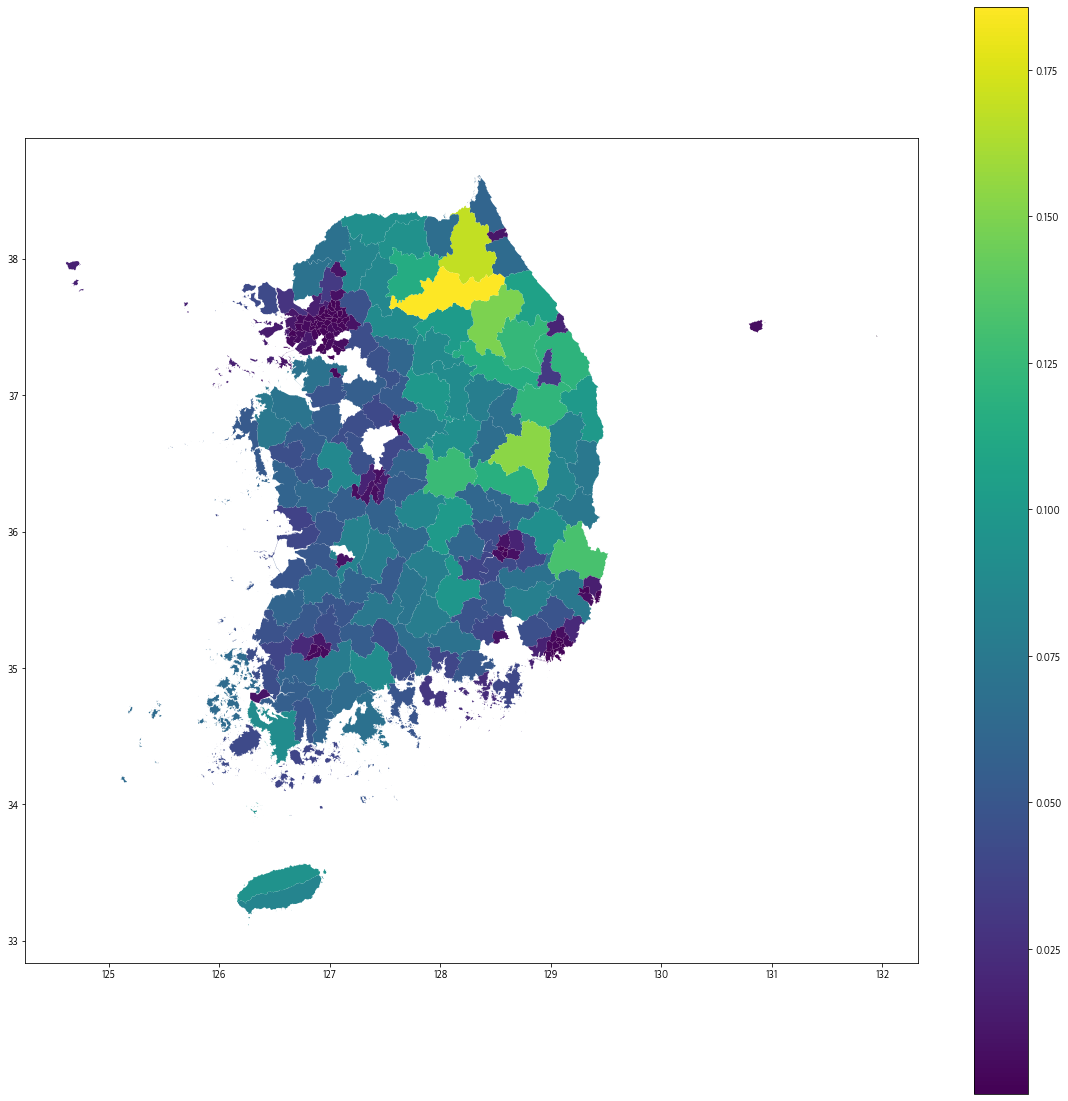

In [7]:
# 지도 boundary, centroid plot
fig, ax = plt.subplots(figsize=(20,20))

# lon_lat_gg_1['boundary'] = lon_lat_gg_1.boundary
# for i in lon_lat_gg_1.index:
#     lon_lat_gg_1['centroid'].plot(ax=ax,color='red')
#     lon_lat_gg_1['boundary'].plot(ax=ax,color='black')
    
lon_lat_gg_1['area'] = lon_lat_gg_1.area
lon_lat_gg_1.plot('area', legend=True, ax=ax)

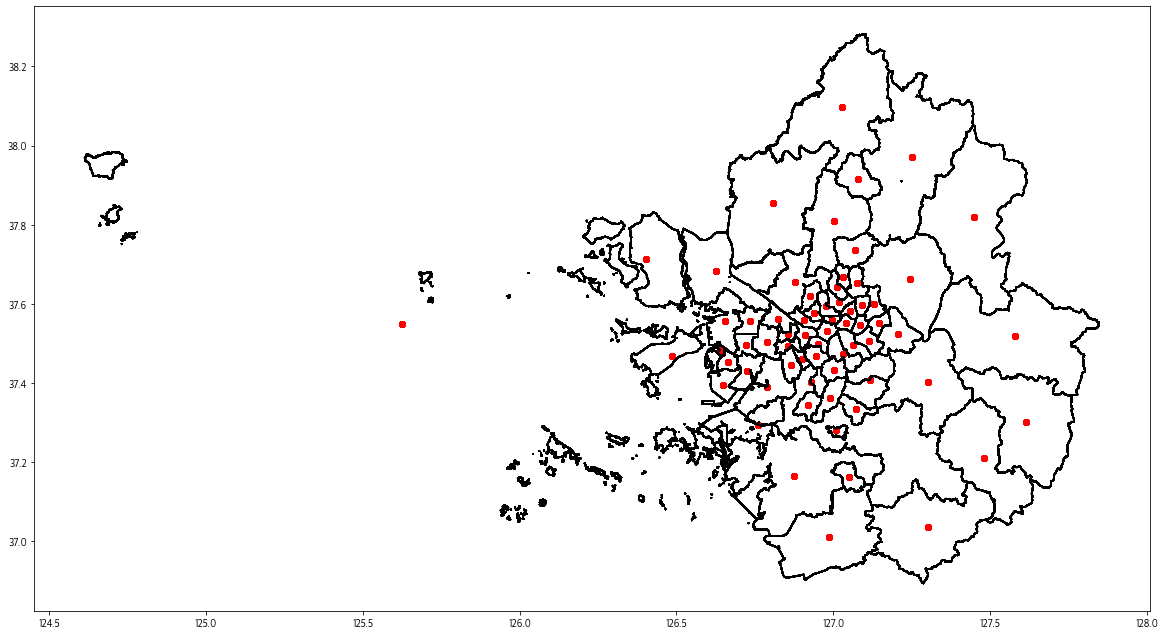

In [5]:
# 수도권 지도 boundary, centroid plot
fig, ax = plt.subplots(figsize=(20,20))

# lon_lat_gg_1['geometry'].plot(ax=ax)
lon_lat_gg_1['boundary'] = lon_lat_gg_1.boundary
for i in lon_lat_gg_1.index:
    lon_lat_gg_1['centroid'].plot(ax=ax,color='red')
    lon_lat_gg_1['boundary'].plot(ax=ax,color='black')

수도권 총  229 개 지역


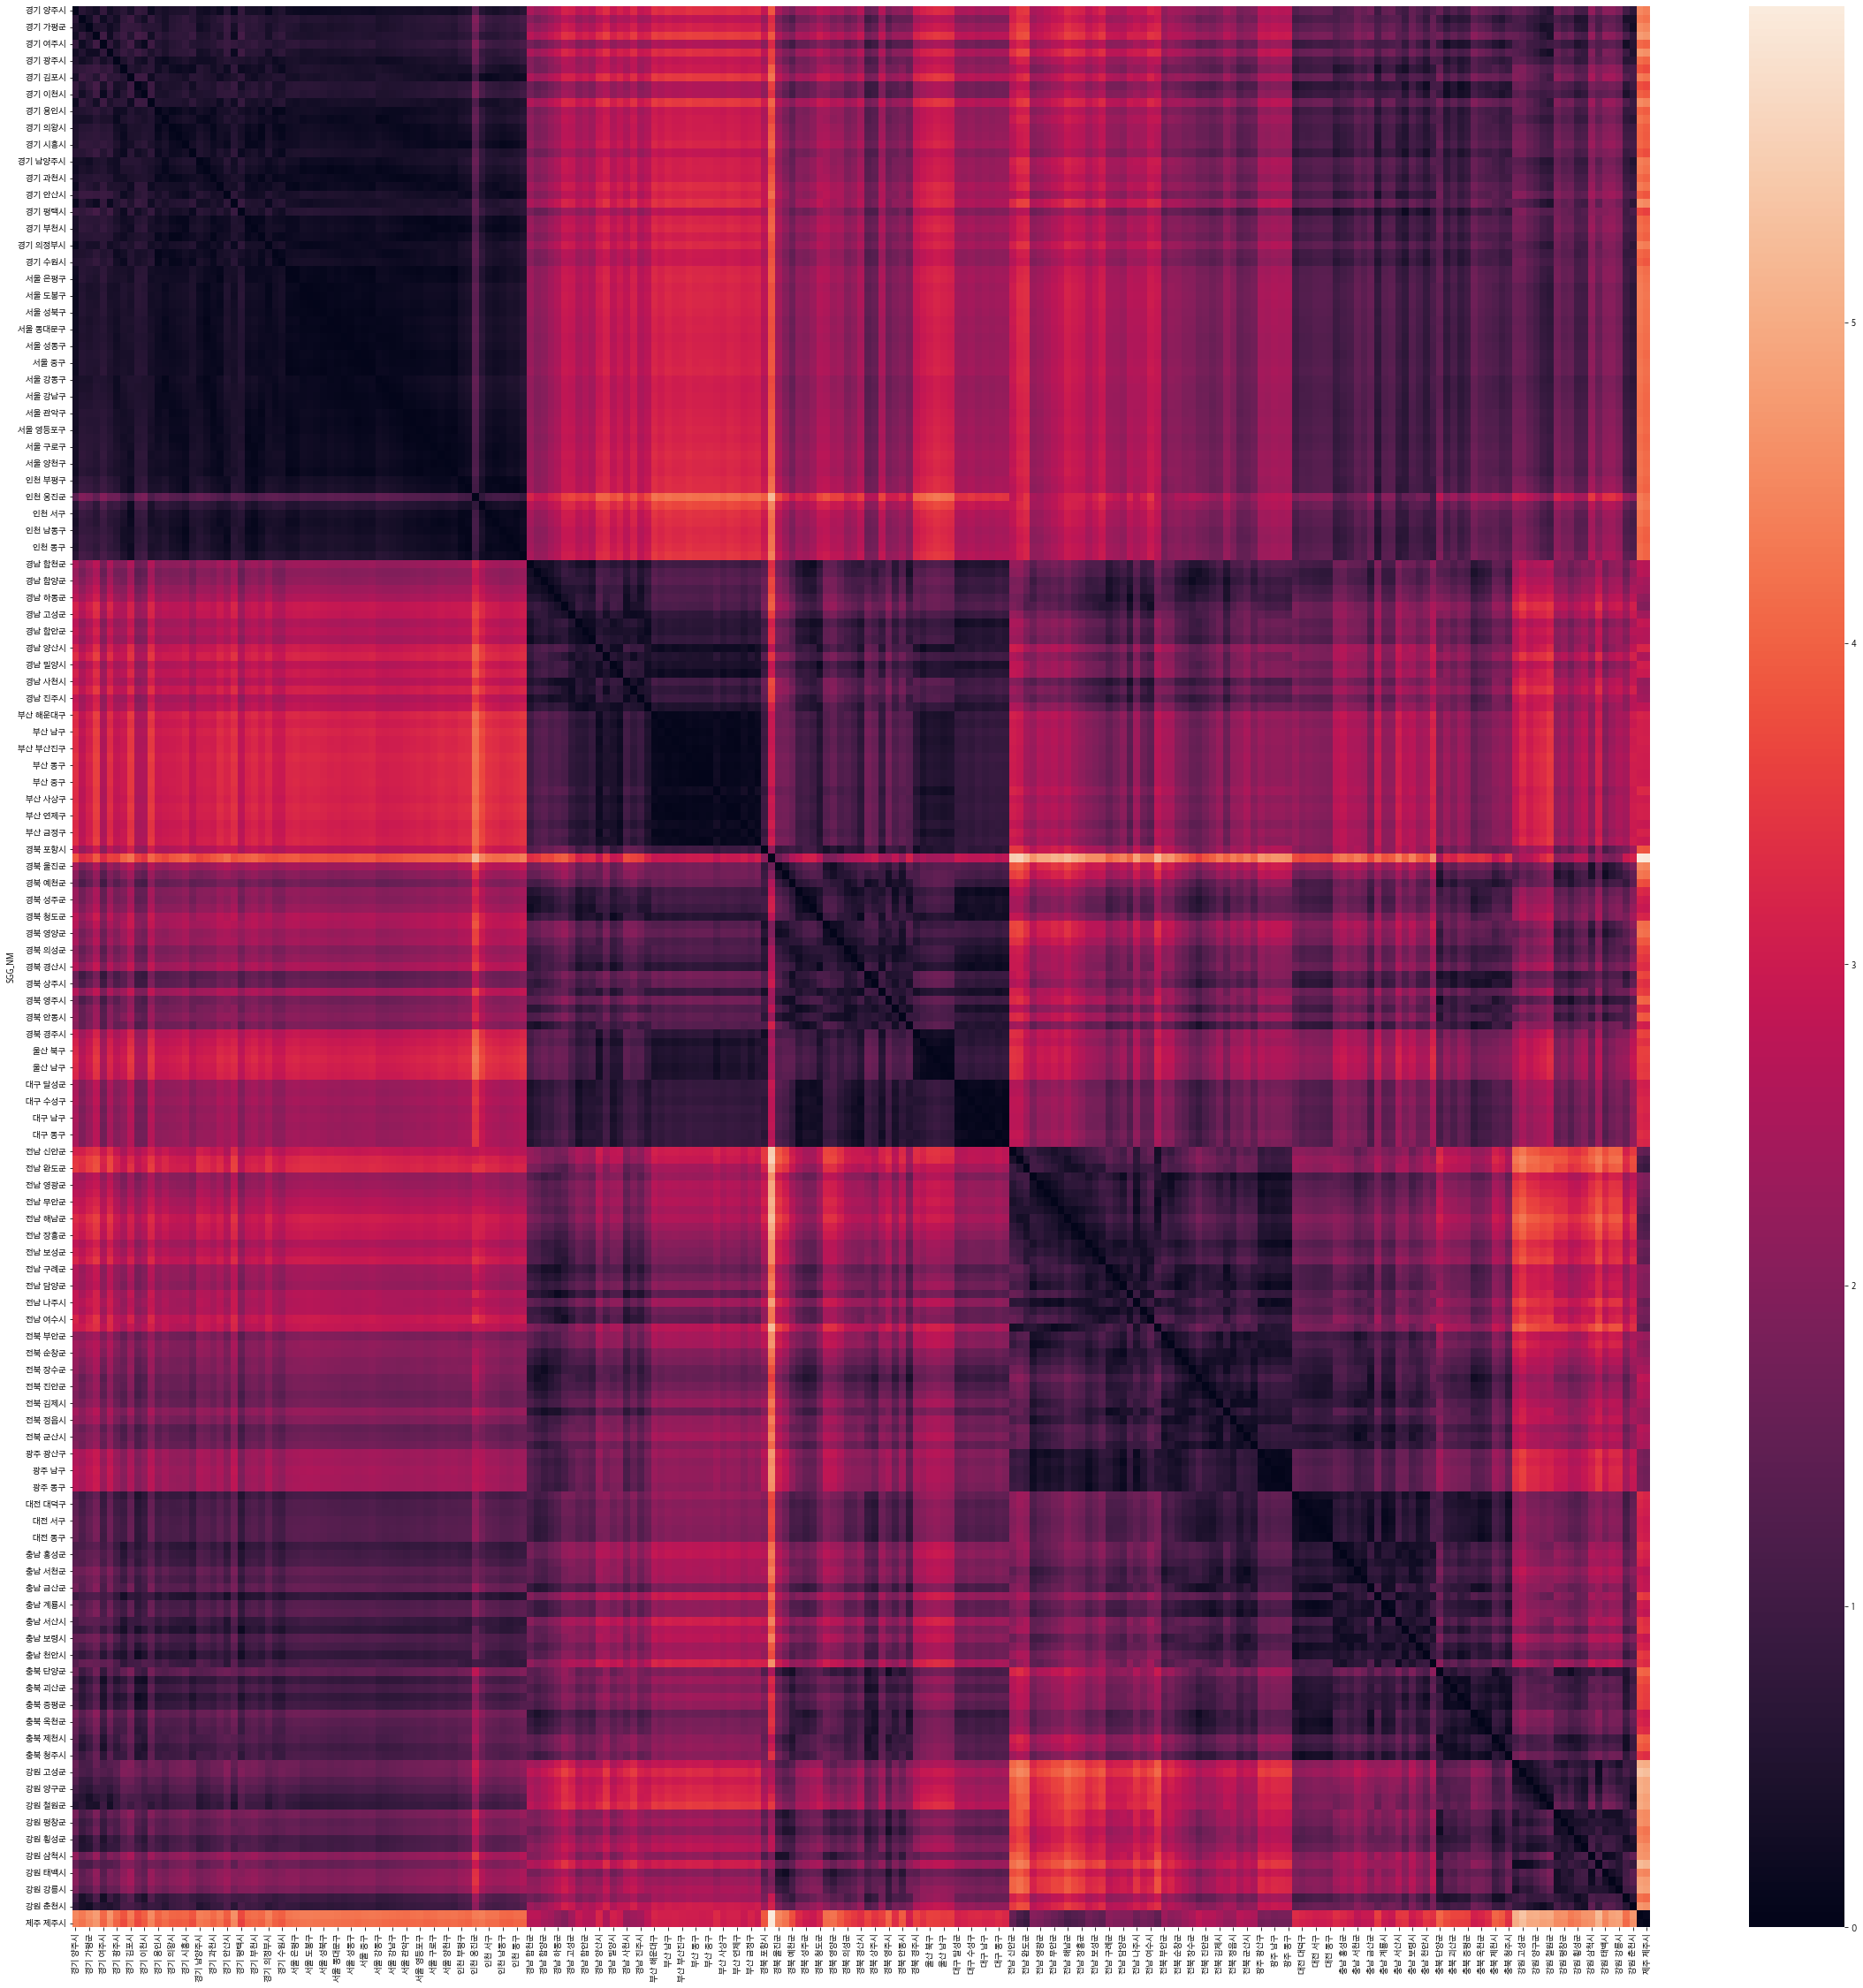

In [46]:
diff_df = pd.DataFrame({})
lon_lat_gg_1 = lon_lat_gg_1.set_index('SGG_NM')
for region in lon_lat_gg_1.index:
    # print(region)
    diff_df[region] = lon_lat_gg_1['centroid'].distance(lon_lat_gg_1['centroid'].loc[region]) # 유클리드 거리 계산

fig, ax = plt.subplots(figsize=(40,40))
ax = sns.heatmap(diff_df)
print('수도권 총 ', len(diff_df), '개 지역')

In [47]:
os.getcwd()

'/Users/jeonjunhwi/문서/Projects/GNN_Covid'

In [48]:
diff_df.to_csv('Data/distances_kr_city_adj_mx.csv', encoding='cp949')

In [51]:
df = pd.read_csv(f'Data/KCDC_data/Processing_Results/smoothing_1_city_mean.csv', index_col=0, encoding='cp949')
df = df.diff().dropna()


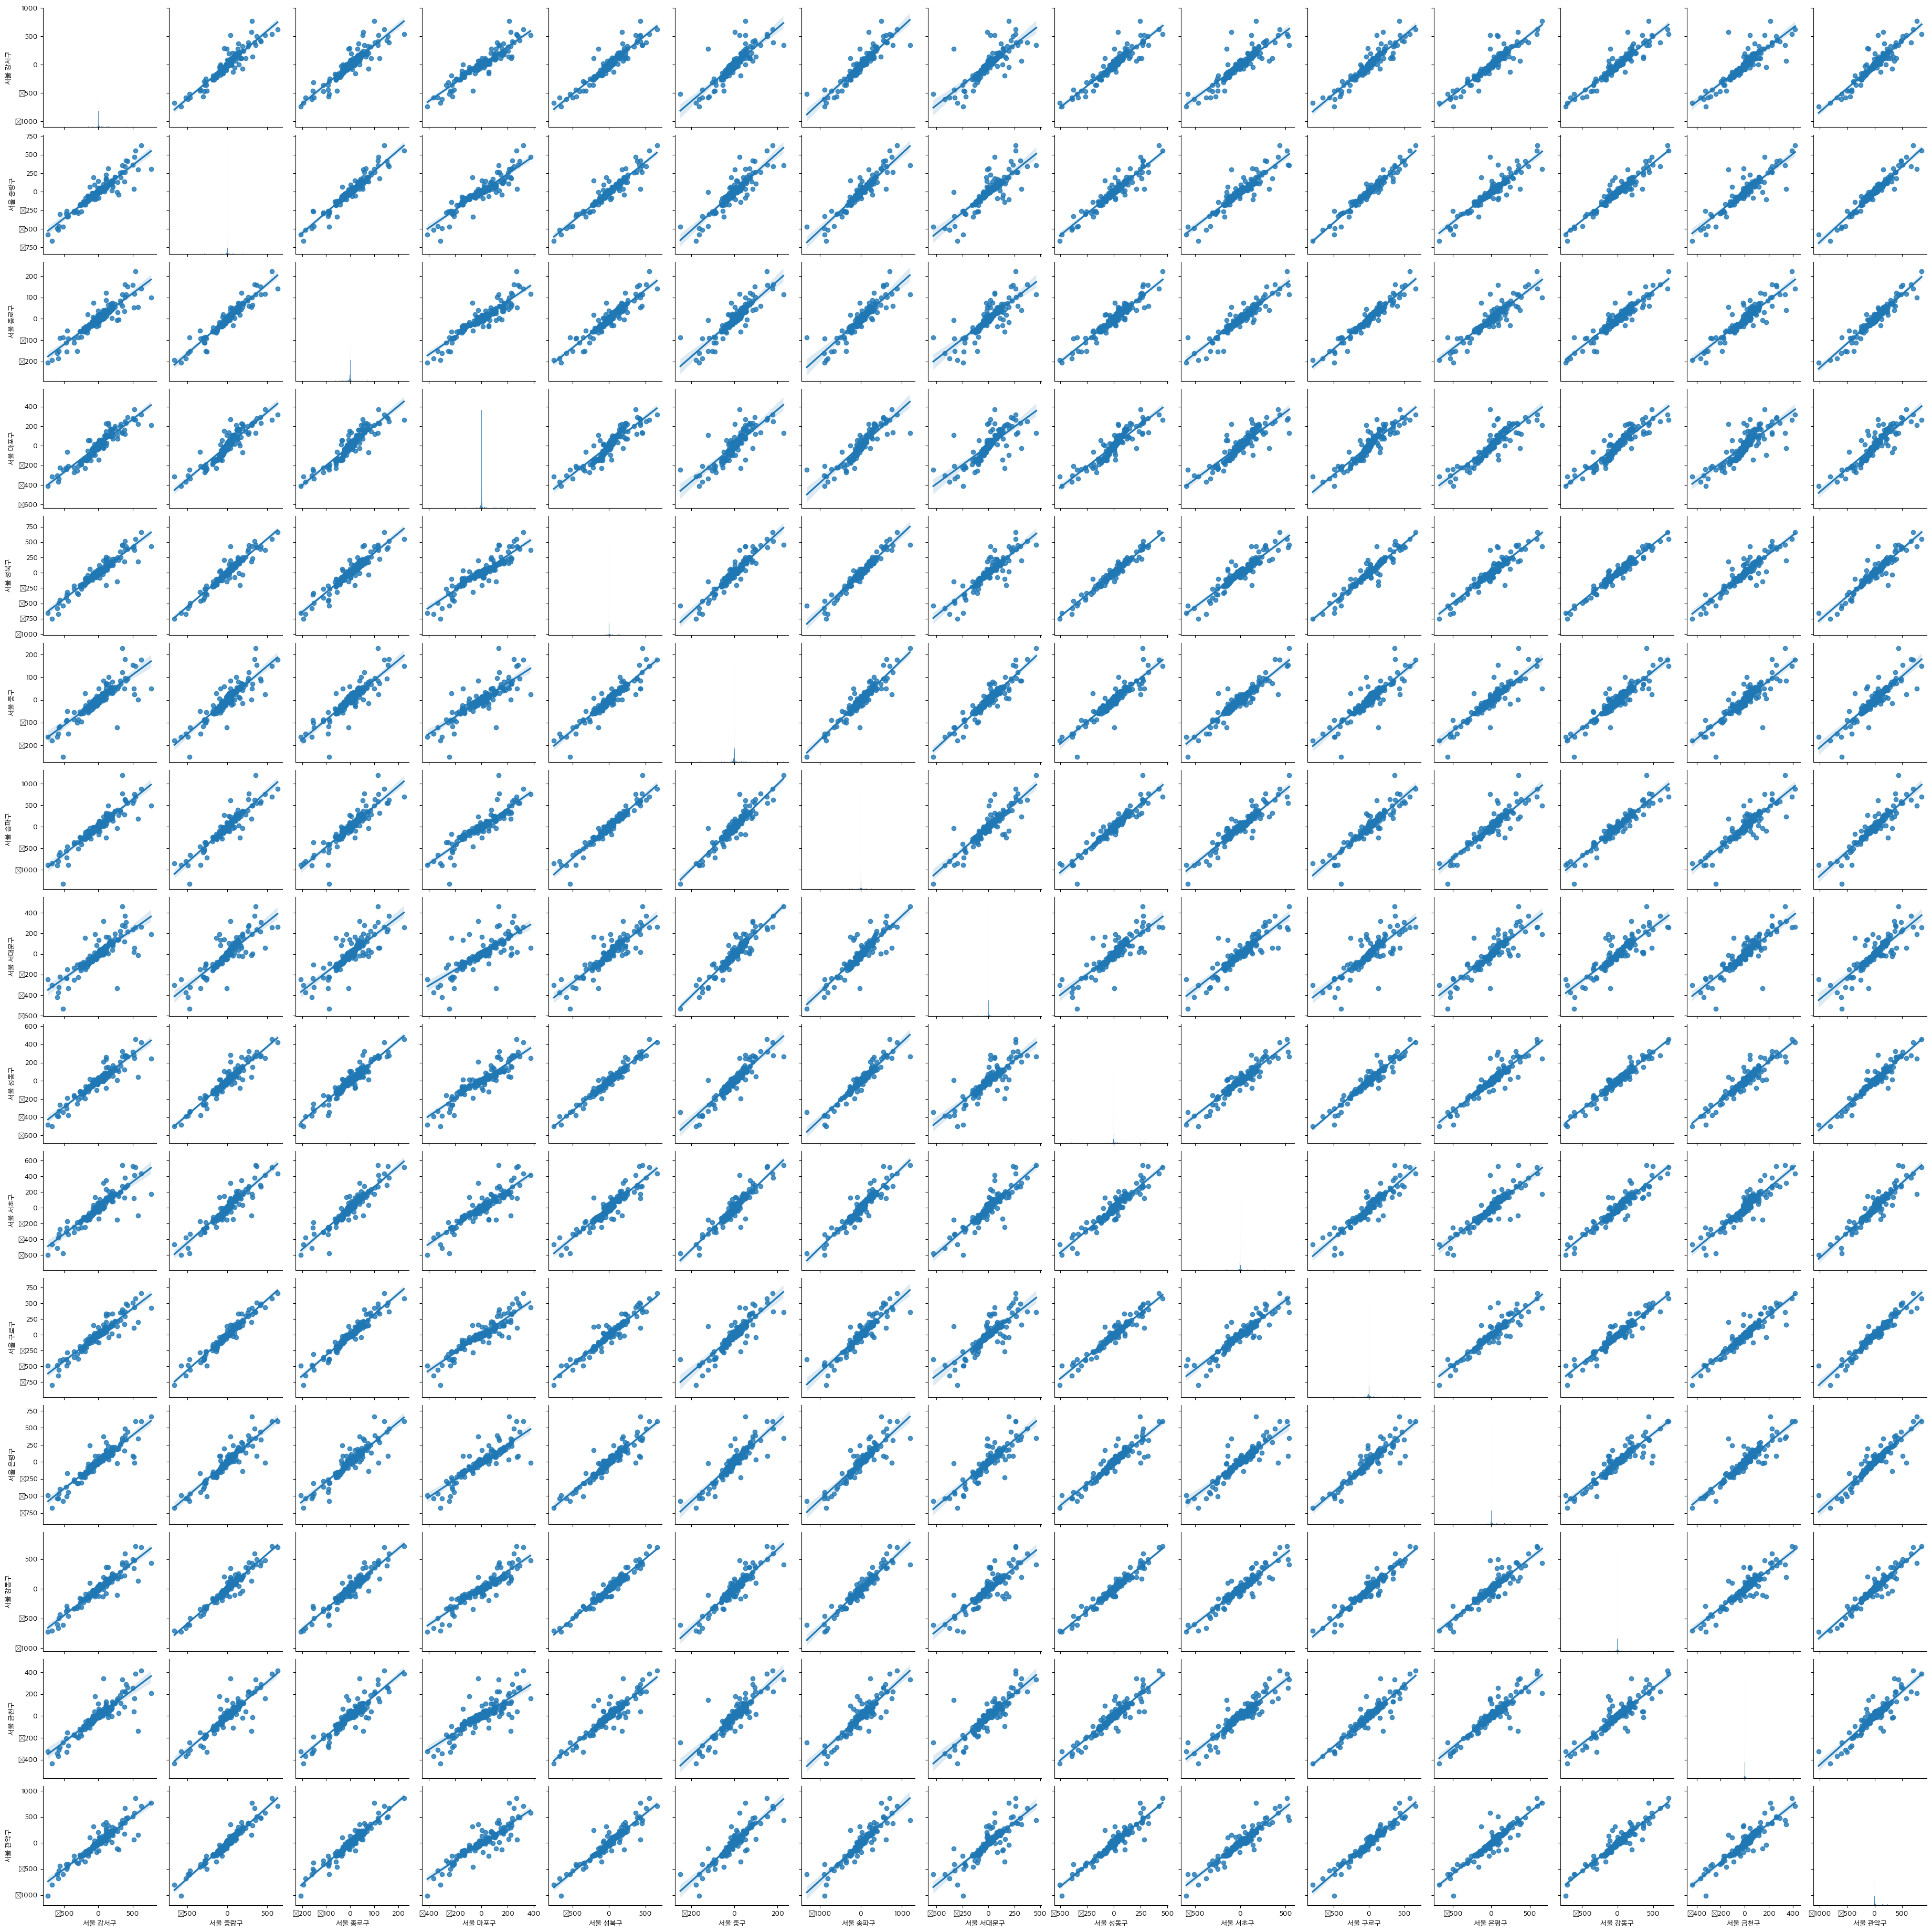

In [8]:
# PAIR PLOT
import seaborn as sns
import matplotlib.pyplot as plt
from math import ceil
import random

# Basic correlogram
# for i in range(50):
# rand_list = random.sample([i for i in range(df.shape[1])], 5)
# p = sns.pairplot(data = df.iloc[:,rand_list], kind='reg')
p = sns.pairplot(data = df.iloc[:,10:25], kind='reg')
plt.show()

In [3]:
import numpy as np
from sklearn.preprocessing import StandardScaler

In [58]:
scaler = StandardScaler()
val = scaler.fit_transform(df[['인천 동구']])
val2 = scaler.fit_transform(df[['인천 서구']])

# 1차 차분에 대한 비정상성 테스트

In [1]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
import pandas as pd
from math import ceil
import warnings
import random
warnings.filterwarnings('ignore')

In [7]:
df1 = pd.read_csv(f'Data/KCDC_data/Processing_Results/smoothing_1_city_mean.csv', index_col=0, encoding='cp949')
df2 = pd.read_csv(f'Data/KCDC_data/Processing_Results/smoothing_3_city_mean.csv', index_col=0, encoding='cp949')
df3 = pd.read_csv(f'Data/KCDC_data/Processing_Results/smoothing_5_city_mean.csv', index_col=0, encoding='cp949')

print(df1.shape, df2.shape, df3.shape)

(940, 229) (938, 229) (936, 229)


In [20]:
df_log

인천 동구    인천 부평구   인천 미추홀구     인천 서구    인천 연수구    인천 계양구  \
신고일                                                                      
2020-01-19  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-20  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-22  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-23  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2022-08-11  4.595120  6.936343  6.731018  7.145984  6.935370  6.529419   
2022-08-12  4.624973  6.861711  6.651572  7.092574  6.858565  6.426488   
2022-08-13  4.727388  6.673298  6.489205  6.853299  6.654153  6.154858   
2022-08-14  3.465736  5.823046  5.786897  6.204558  6.222576  5.468060   
2022-08-15  4.007333  6.381816  6.246107  6.383507  6.455199  5.003946   

              인천 남동구     인천 중구    인천 강화군    인천 옹진군  ...    강원 홍천군    강원 철원군  \
신고일                                                 ...                       
2020-01-19  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
2020-01-20  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
2020-01-21  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
2020-01-22  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
2020-01-23  0.000000  0.000000  0.000000  0.000000  ...  0.000000  0.000000   
...              ...       ...       ...       ...  ...       ...       ...   
2022-08-11  7.041412  5.945421  5.337538  4.330733  ...  5.416100  4.836282   
2022-08-12  6.942157  5.988961  4.990433  3.610918  ...  5.389072  4.753590   
2022-08-13  6.802395  5.780744  4.828314  2.995732  ...  5.099866  4.454347   
2022-08-14  6.144186  5.308268  4.488636  2.484907  ...  4.543295  4.158883   
2022-08-15  6.373320  5.117994  4.718499  3.091042  ...  4.394449  2.833213   

              강원 양양군    강원 영월군    강원 동해시    강원 화천군    강원 정선군    강원 인제군  \
신고일                                                                      
2020-01-19  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-20  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-21  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-22  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
2020-01-23  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
...              ...       ...       ...       ...       ...       ...   
2022-08-11  4.564348  4.127134  5.365976  4.795791  4.442651  4.595120   
2022-08-12  4.605170  4.304065  5.209486  4.875197  4.343805  4.700480   
2022-08-13  4.248495  4.304065  5.198497  4.356709  3.912023  4.574711   
2022-08-14  3.135494  4.077537  3.828641  4.234107  3.663562  4.094345   
2022-08-15  4.077537  3.526361  4.955827  4.276666  3.761200  3.465736   

              강원 양구군    강원 횡성군  
신고일                             
2020-01-19  0.000000  0.000000  
2020-01-20  0.000000  0.000000  
2020-01-21  0.000000  0.000000  
2020-01-22  0.000000  0.000000  
2020-01-23  0.000000  0.000000  
...              ...       ...  
2022-08-11  4.204693  4.553877  
2022-08-12  4.110874  4.595120  
2022-08-13  3.871201  4.276666  
2022-08-14  3.931826  3.295837  
2022-08-15  3.401197  4.077537  

[940 rows x 229 columns]

In [21]:
df2 = pd.read_csv(f'Data/KCDC_data/Processing_Results/smoothing_1_city_mean.csv', index_col=0, encoding='cp949')
df = df2.iloc[:340]

df_log = np.log(df2) # log변환
scaler = StandardScaler()
df_log.replace([np.inf, -np.inf], 0, inplace=True)
df_log_scale = scaler.fit_transform(df_log)

In [22]:
df_log_scale

array([[-0.60567947, -1.00825036, -0.92454841, ..., -0.51865997,
        -0.51712365, -0.50556427],
       [-0.60567947, -1.00825036, -0.92454841, ..., -0.51865997,
        -0.51712365, -0.50556427],
       [-0.60567947, -1.00825036, -0.92454841, ..., -0.51865997,
        -0.51712365, -0.50556427],
       ...,
       [ 2.1521094 ,  1.76964296,  1.80942799, ...,  2.22182717,
         2.09069821,  2.24742487],
       [ 1.41610683,  1.41570859,  1.51353777, ...,  1.93406298,
         2.13153778,  1.61604234],
       [ 1.7320553 ,  1.64830779,  1.70700795, ...,  1.55749406,
         1.7740818 ,  2.11924112]])

In [5]:
df2 = pd.read_csv(f'Data/KCDC_data/Processing_Results/smoothing_1_city_mean.csv', index_col=0, encoding='cp949')
df = df2.iloc[:340]

df_log = np.log(df2) # log변환
df = df.diff().dropna() # 1차 차분
df_log = df_log.diff().dropna() # 로그 1차 차분
df_diff_2 = df.diff().dropna() # 2차 차분

plt.figure(figsize=(20,10))
rand_idx = []
select_num = 5
for _ in range(select_num):
    rand_idx.append(random.randint(0, 229))
ct = 0

for i, region in enumerate(df.columns[rand_idx]):
    # 1차 차분
    ct = ct+1
    ax = plt.subplot(select_num, 3, ct)
    result = adfuller(df.iloc[:,i])
    plot_acf(df.iloc[:,i], ax=ax)
    title_ = '{} \n ADF : {:.4f}, p-val : {:.4f}, # of lags : {} \n crit_1% : {:.4f}, crit_5% : {:.4f}'
    title_ = title_.format(region, result[0], result[1], result[2], result[4]['1%'], result[4]['5%'])
    if result[1] > 0.05:
        print(title_)
    plt.title(title_)
    
    # log 차분
    ct = ct+1
    ax = plt.subplot(select_num, 3, ct)
    result_log = adfuller(df_log.iloc[:,i])
    plot_acf(df_log.iloc[:,i], ax=ax)
    title_ = '{}_log \n ADF : {:.4f}, p-val : {:.4f}, # of lags : {} \n crit_1% : {:.4f}, crit_5% : {:.4f}'
    title_log = title_.format(region, result_log[0], result_log[1], result_log[2], result_log[4]['1%'], result_log[4]['5%'])    
    if result_log[1] > 0.05:
        print(title_log)
    plt.title(title_log)
    
    # 2차 차분
    ct = ct+1
    ax = plt.subplot(select_num, 3, ct)
    result_diff_2 = adfuller(df_diff_2.iloc[:,i])
    plot_acf(df_diff_2.iloc[:,i], ax=ax)
    title_ = '{}_diff_2 \n ADF : {:.4f}, p-val : {:.4f}, # of lags : {} \n crit_1% : {:.4f}, crit_5% : {:.4f}'
    title_diff_2 = title_.format(region, result_diff_2[0], result_diff_2[1], result_diff_2[2], result_diff_2[4]['1%'], result_diff_2[4]['5%'])    
    if result_diff_2[1] > 0.05:
        print(title_diff_2)
    plt.title(title_diff_2)
    
    plt.tight_layout()
    # plt.savefig(f'/Users/jeonjunhwi/문서/Projects/Master_GNN/Data/KCDC_data/acf_plot/{region}.png')
    # plt.close()

NameError: name 'plt' is not defined

# Plot Korea Region Metric

결과 다시 낸 다음에, 경로 수정 필요 \
11/1일 코드 재정비후 경로 수정 안함

In [6]:
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

# 한국 geodataframe에서 색으로 표시하기 위해 예외처리로 제외된 remove_list를 딕셔너리로 저장
enc_list = ['경기 성남시', '경기 안산시', '경기 수원시', '경기 안양시', '경기 고양시', '경기 용인시', '경남 창원시', '경북 포항시', '충남 천안시', '세종 세종시', '전북 전주시', '충북 청주시']
region_dict = {}

for i, region in enumerate(remove_list):
    if i<3:
        region_dict[region] = enc_list[0]
    elif i<5:
        region_dict[region] = enc_list[1]
    elif i<9:
        region_dict[region] = enc_list[2]
    elif i<11:
        region_dict[region] = enc_list[3]
    elif i<14:
        region_dict[region] = enc_list[4]
    elif i<17:
        region_dict[region] = enc_list[5]
    elif i<24:
        region_dict[region] = enc_list[6]
    elif i<26:
        region_dict[region] = enc_list[7]
    elif i<29:
        region_dict[region] = enc_list[8]
    elif i<31:
        region_dict[region] = enc_list[8]
    elif i<33:
        region_dict[region] = enc_list[9]
    elif i<37:
        region_dict[region] = enc_list[10]
        

# 위와 동일하게 전처리를 해줌
gdf_tmp['SGG_NM'] = gdf_tmp['SGG_NM'].str.replace('서울시', '')
gdf_tmp = gdf_tmp.set_index('SGG_NM')

<AxesSubplot:>

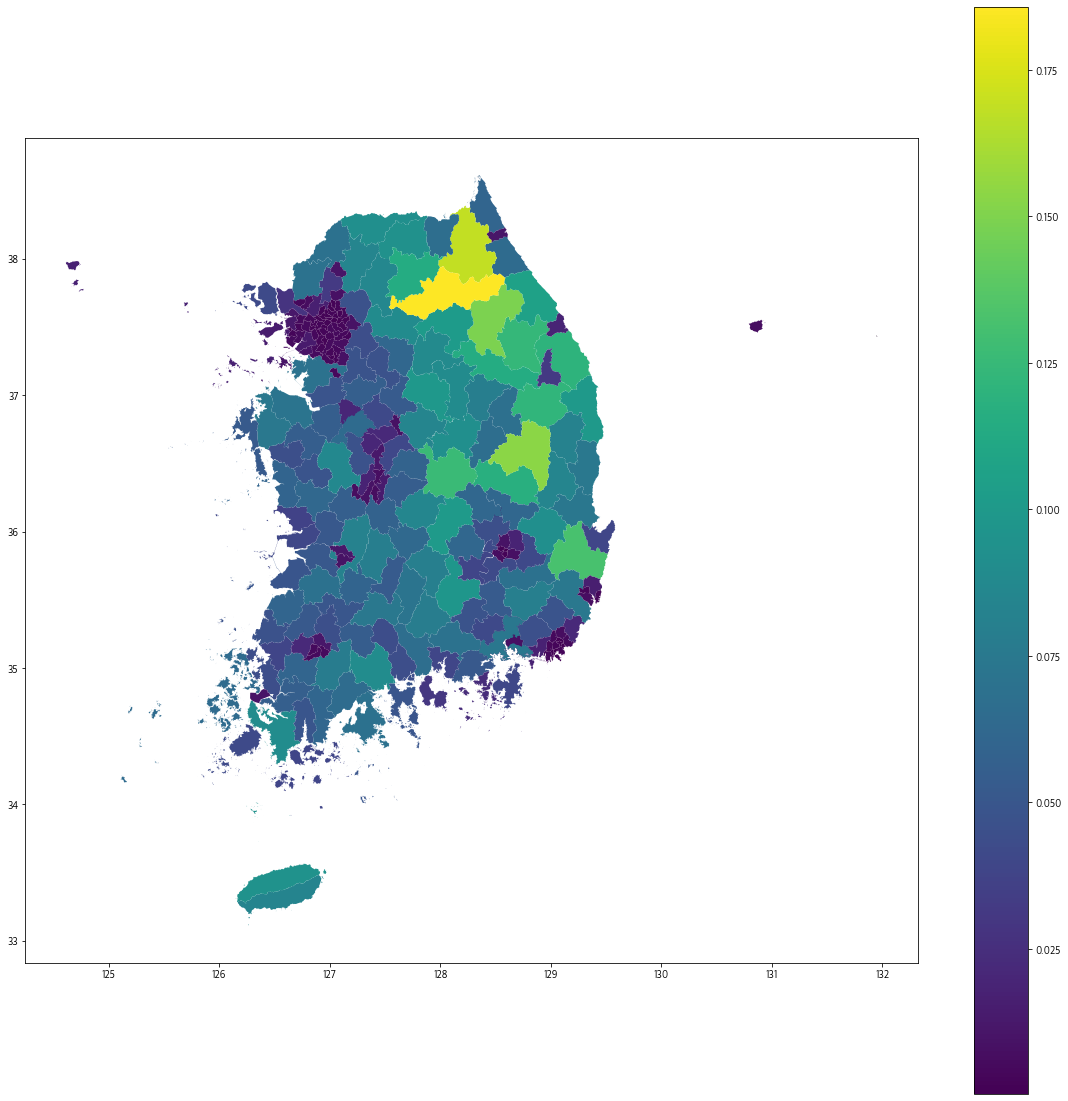

In [8]:
# 지도 boundary, centroid plot
fig, ax = plt.subplots(figsize=(20,20))
    
gdf_tmp['area'] = gdf_tmp.area
gdf_tmp.plot('area', legend=True, ax=ax)

# Diameter plot

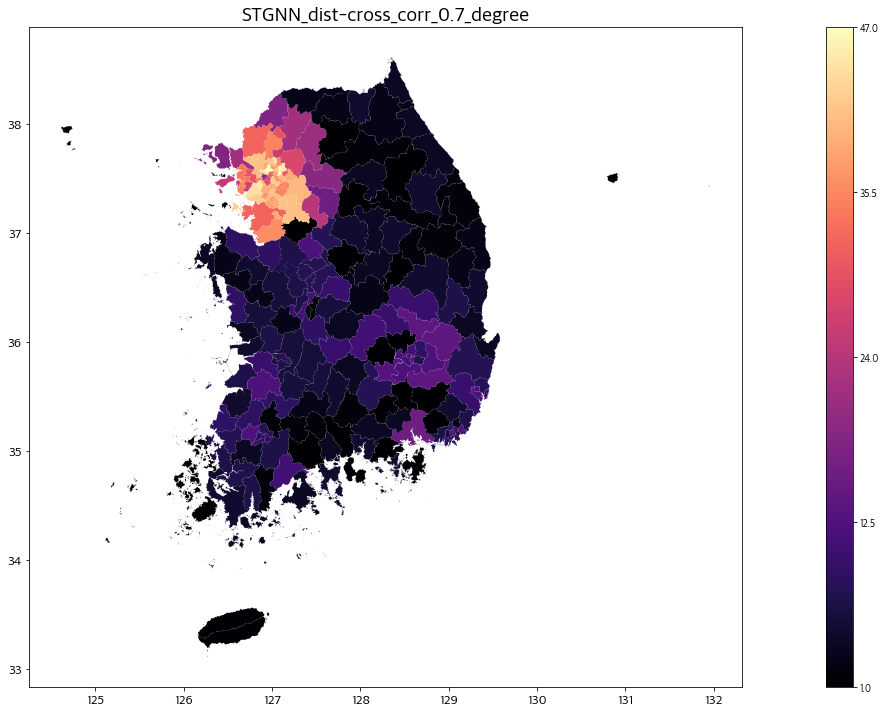

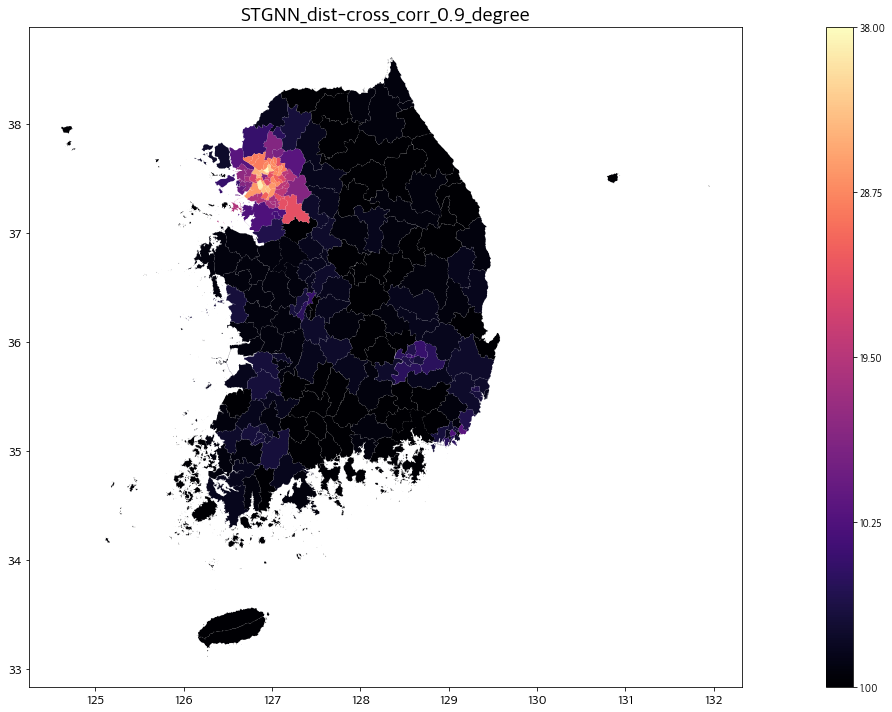

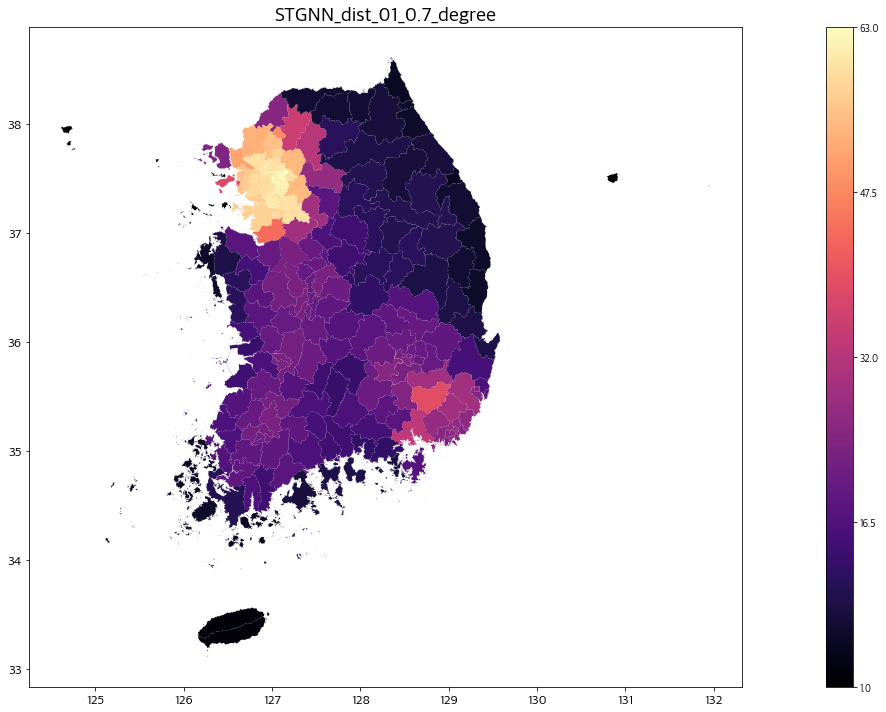

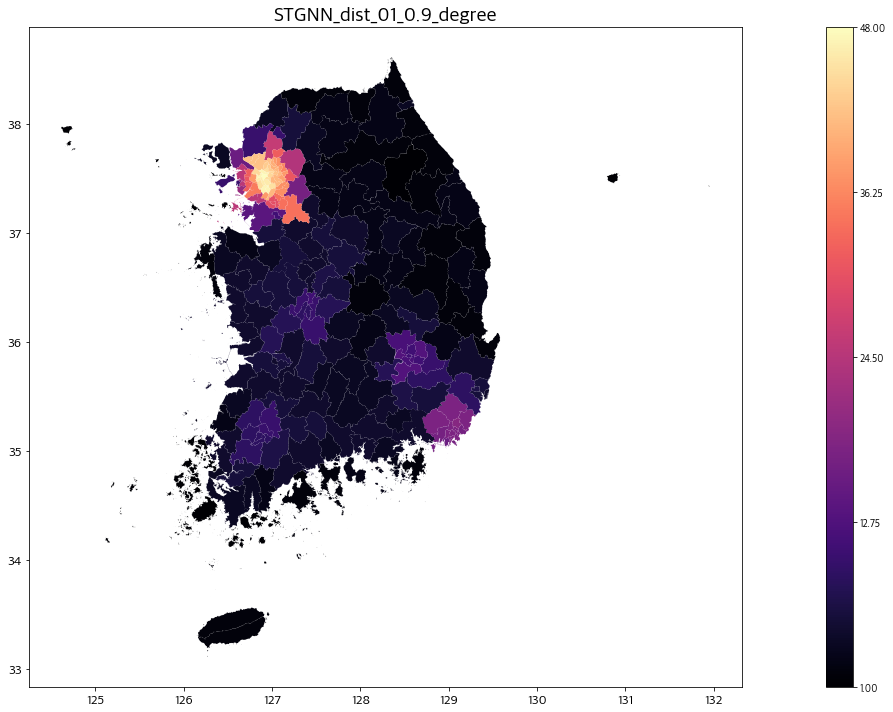

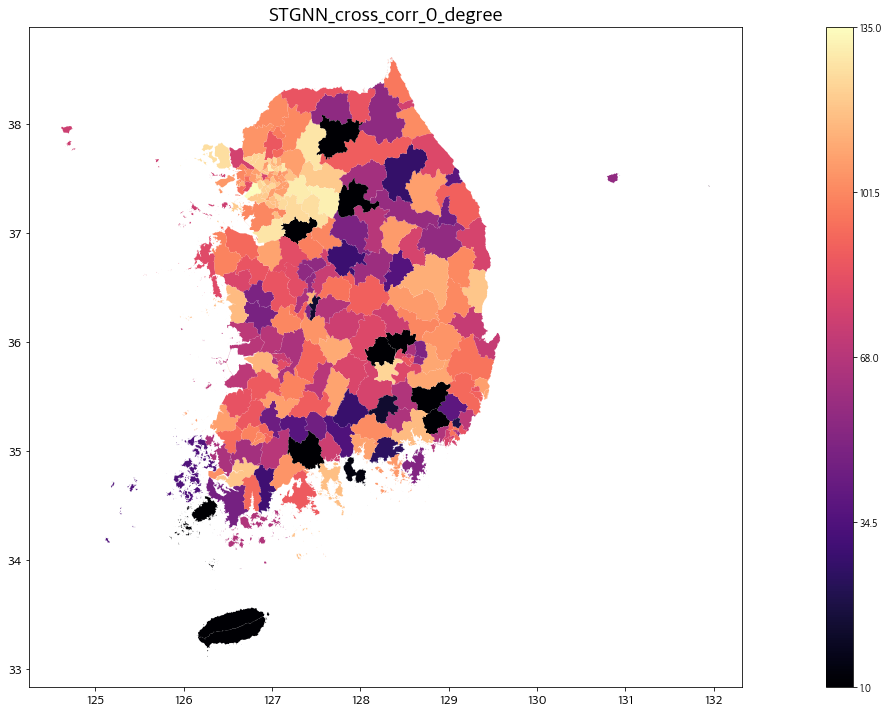

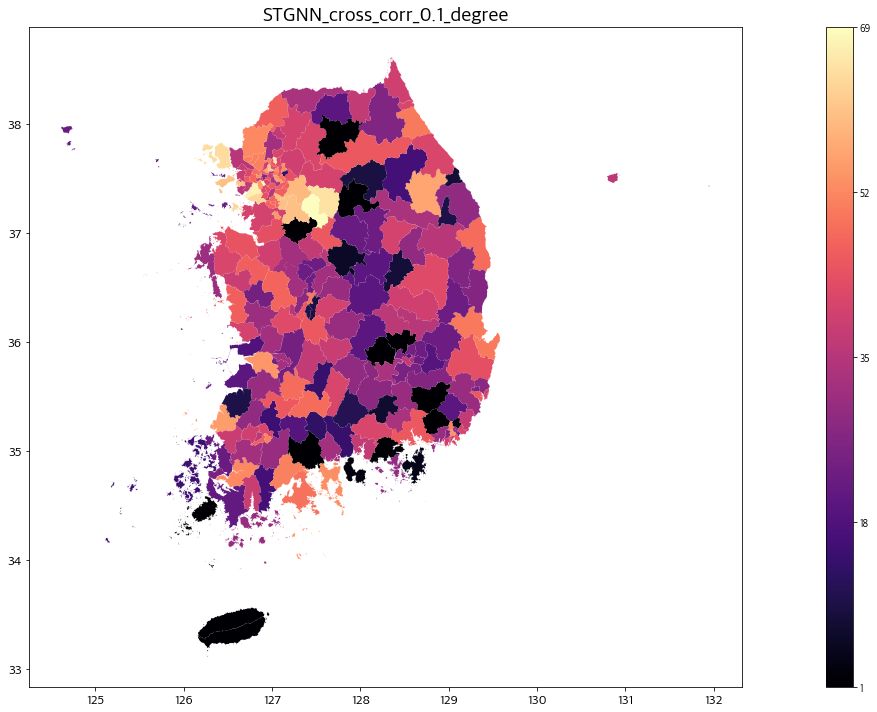

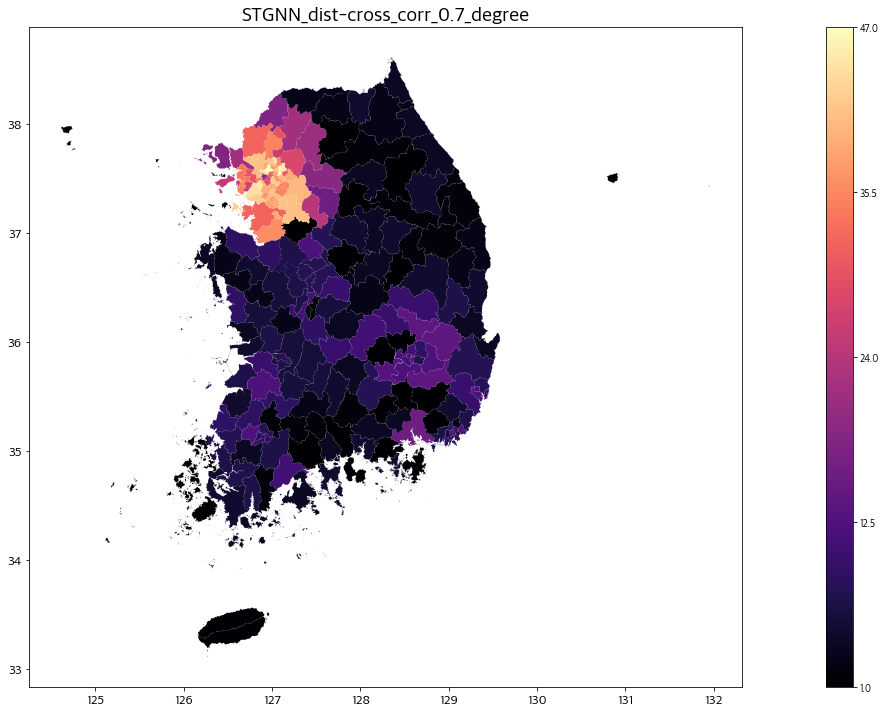

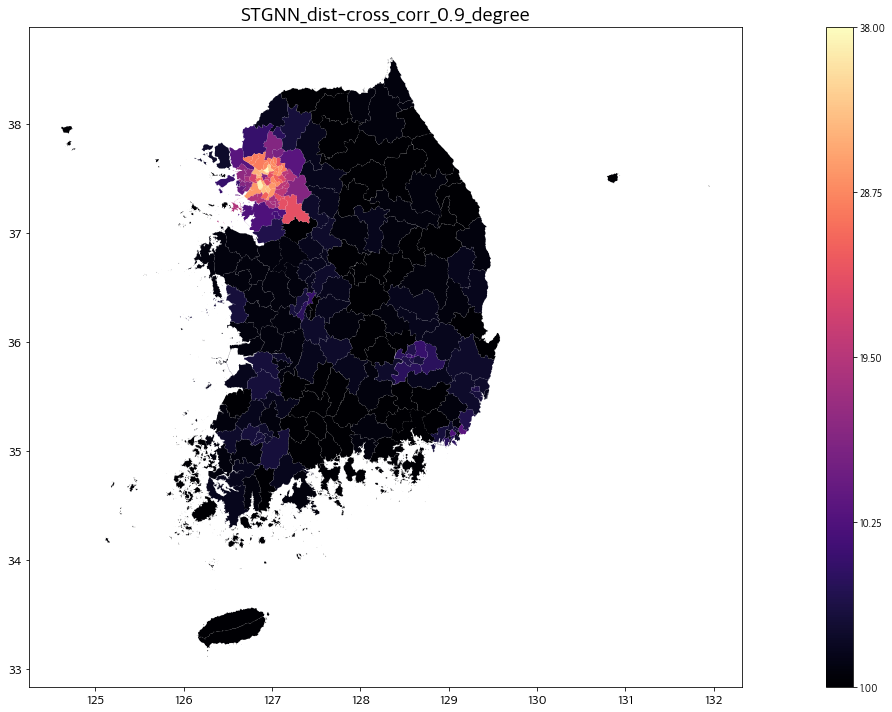

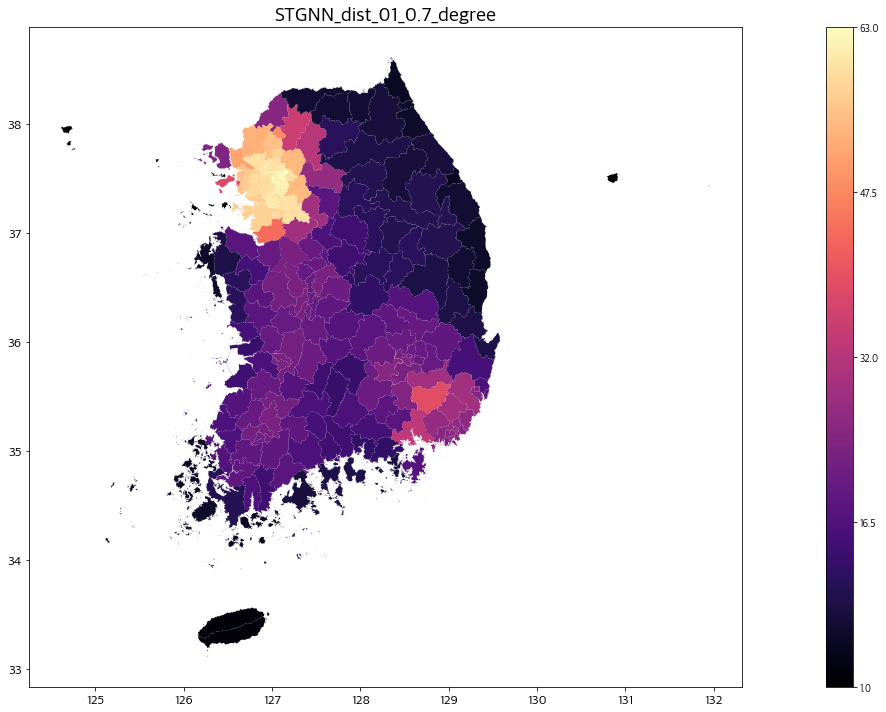

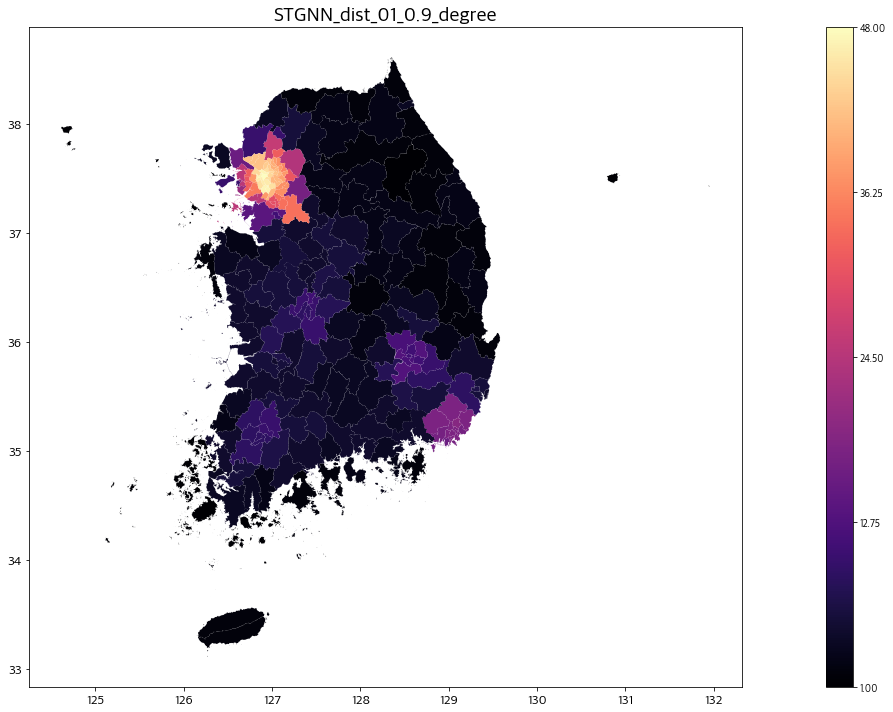

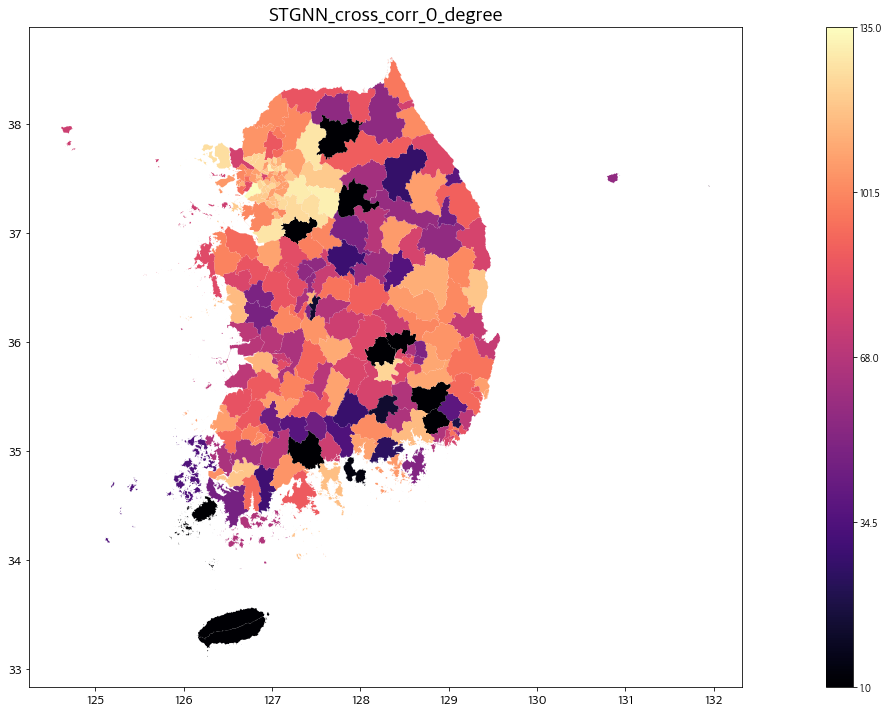

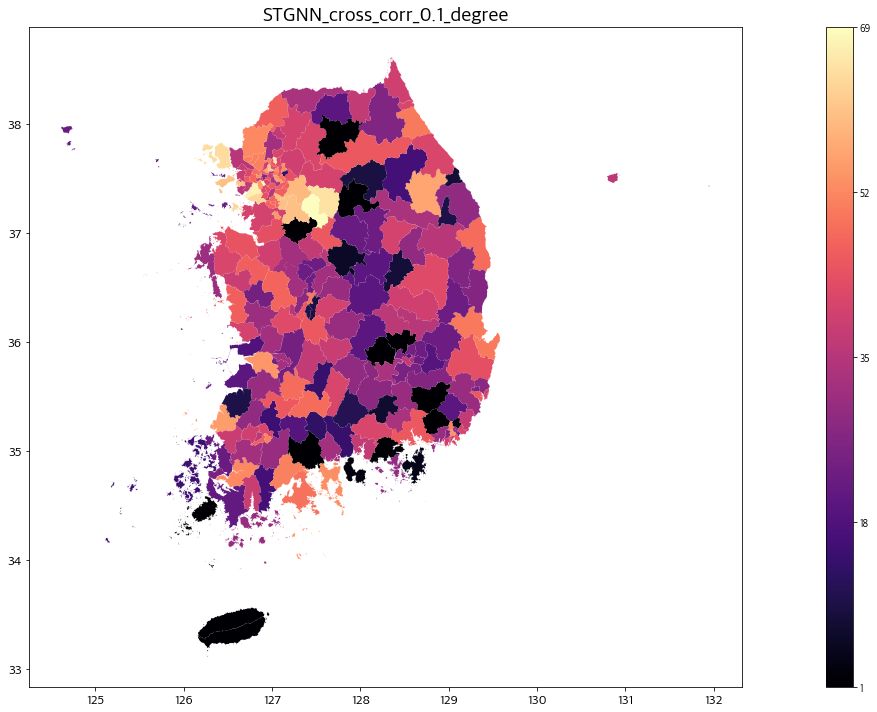

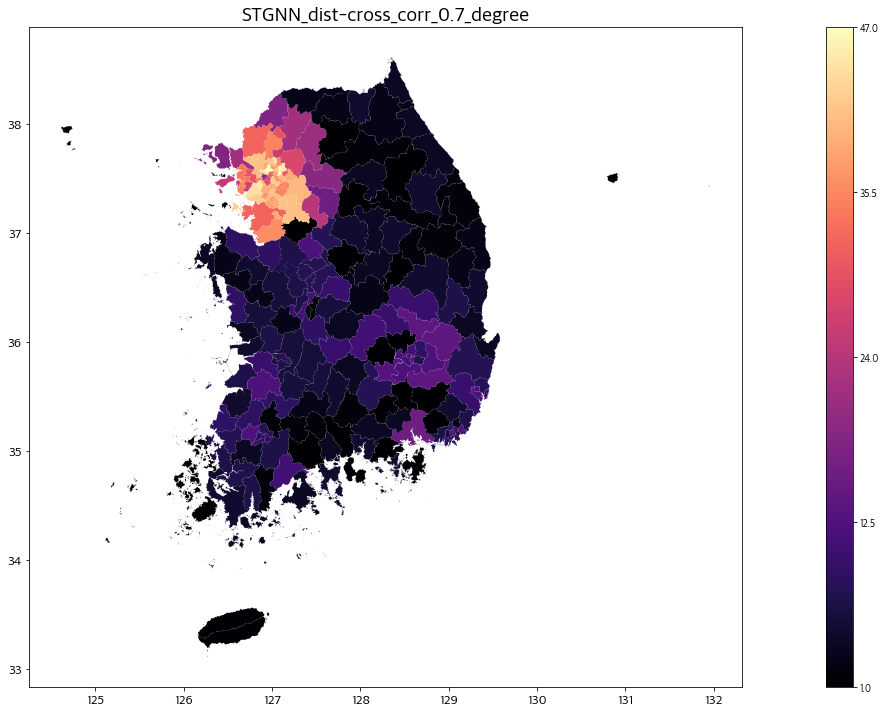

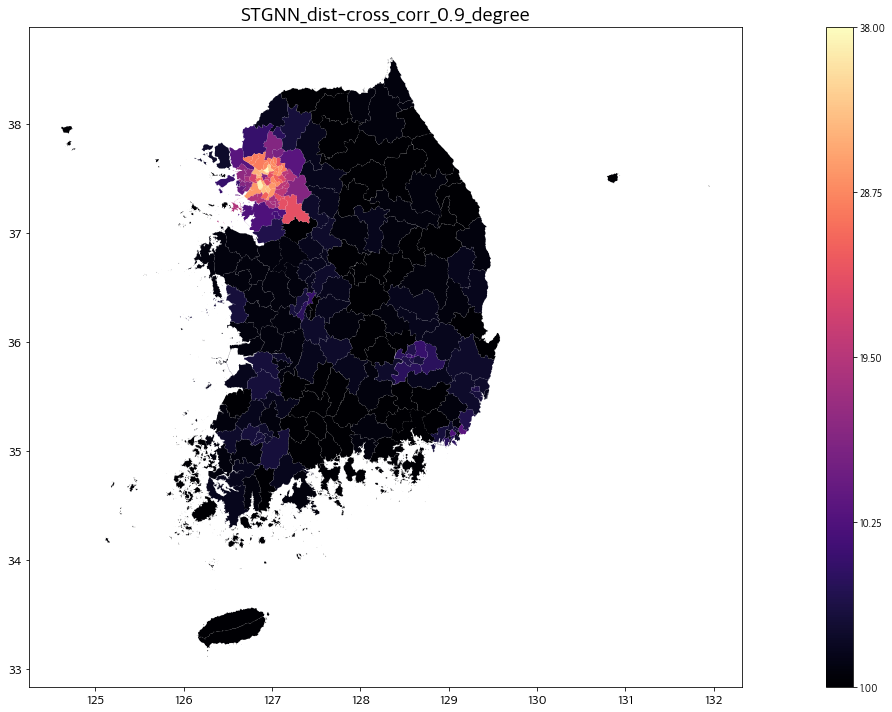

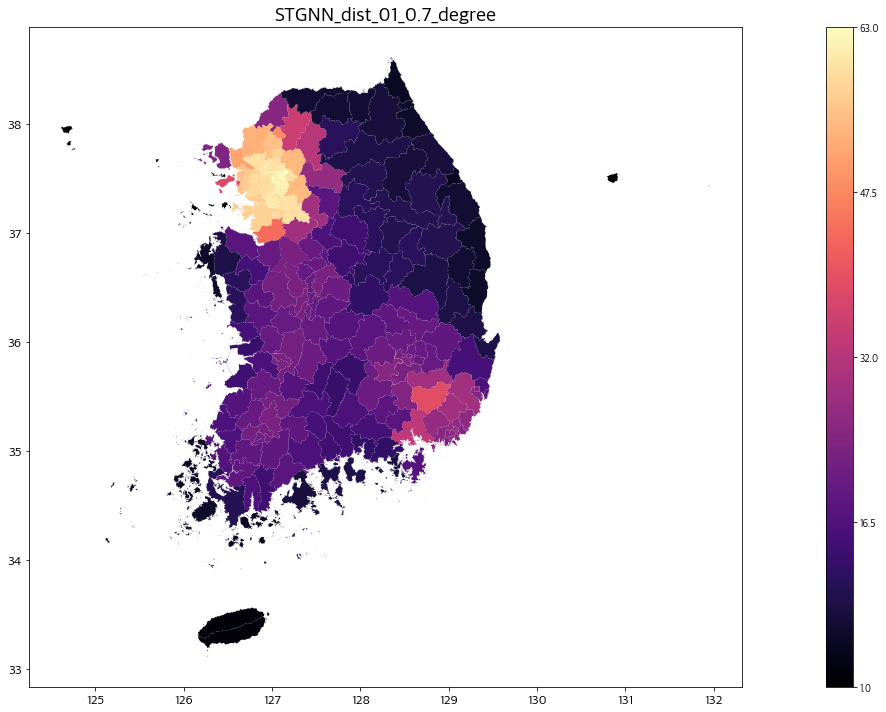

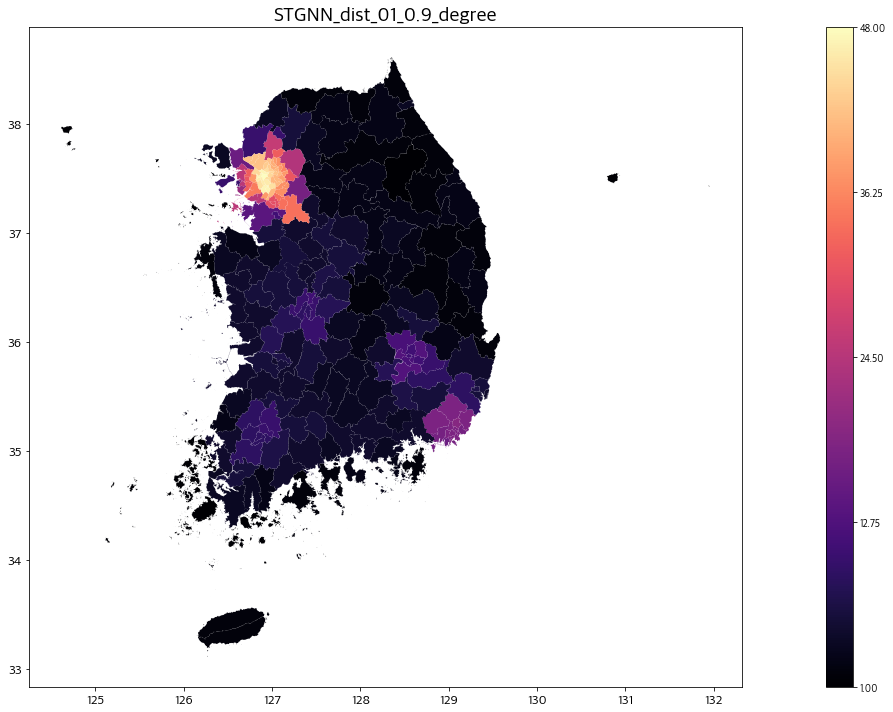

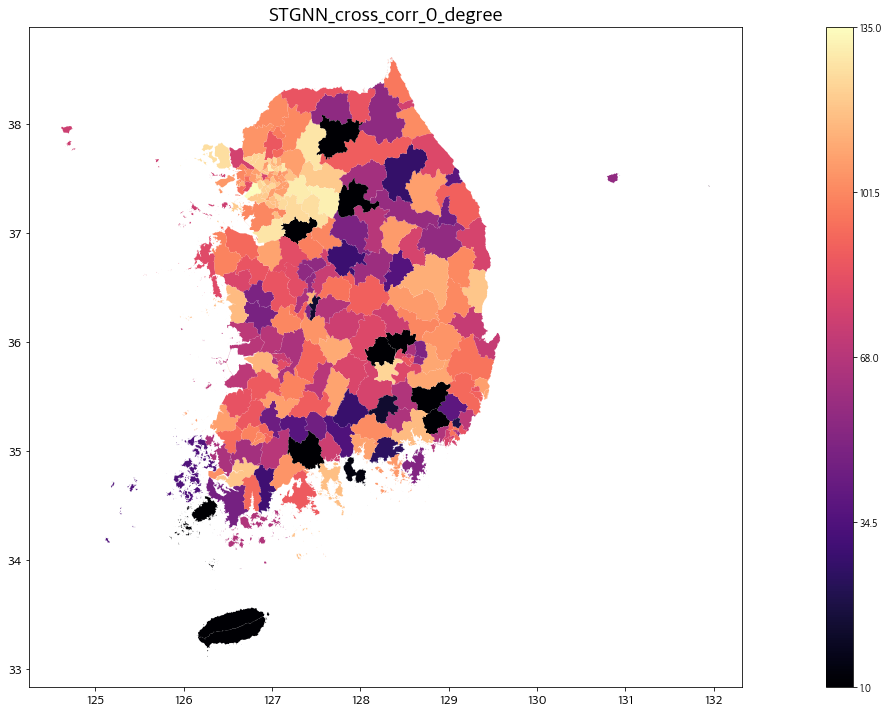

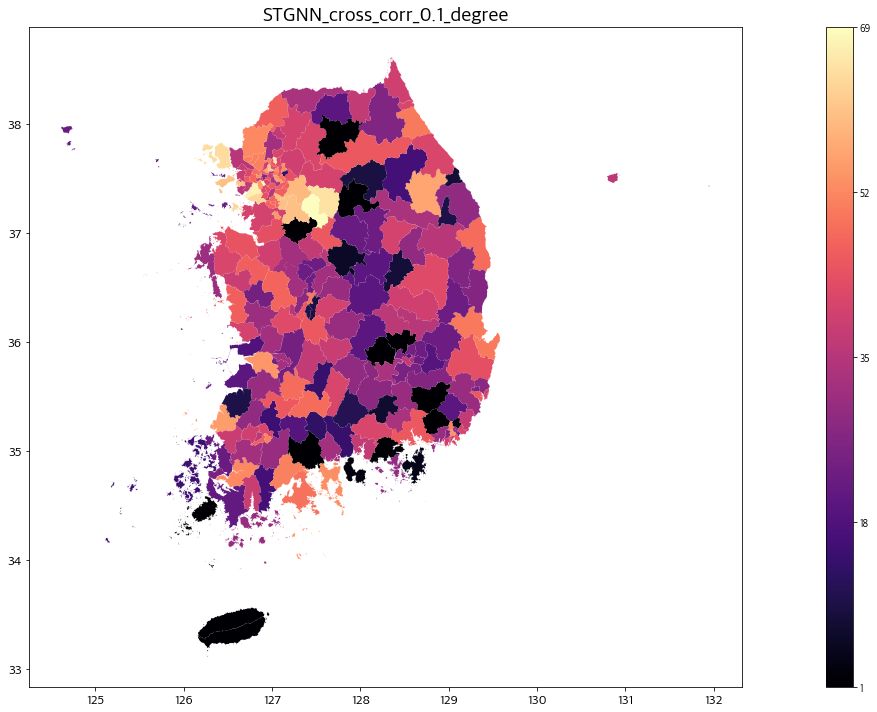

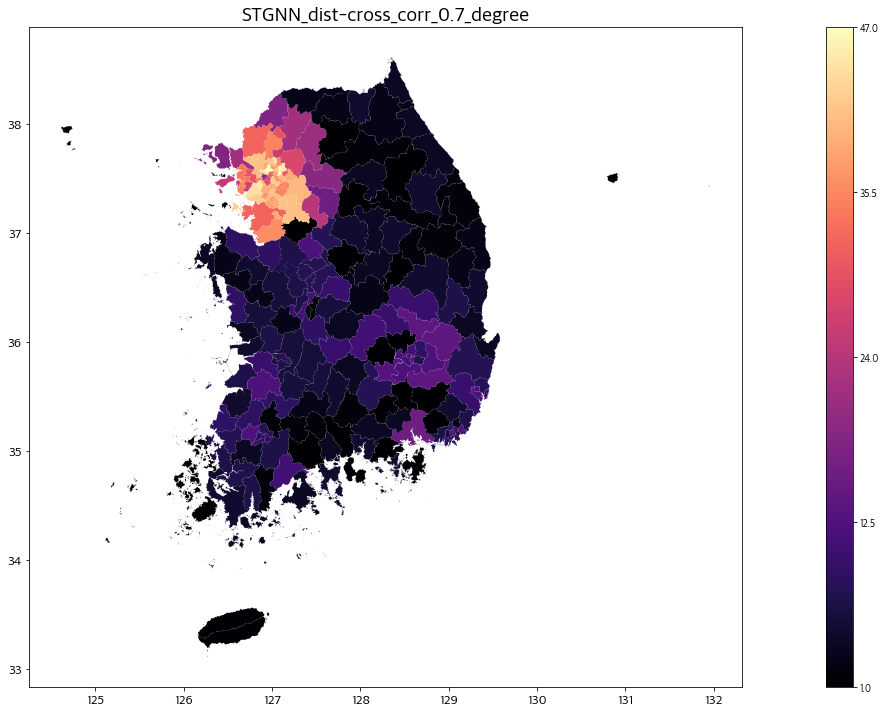

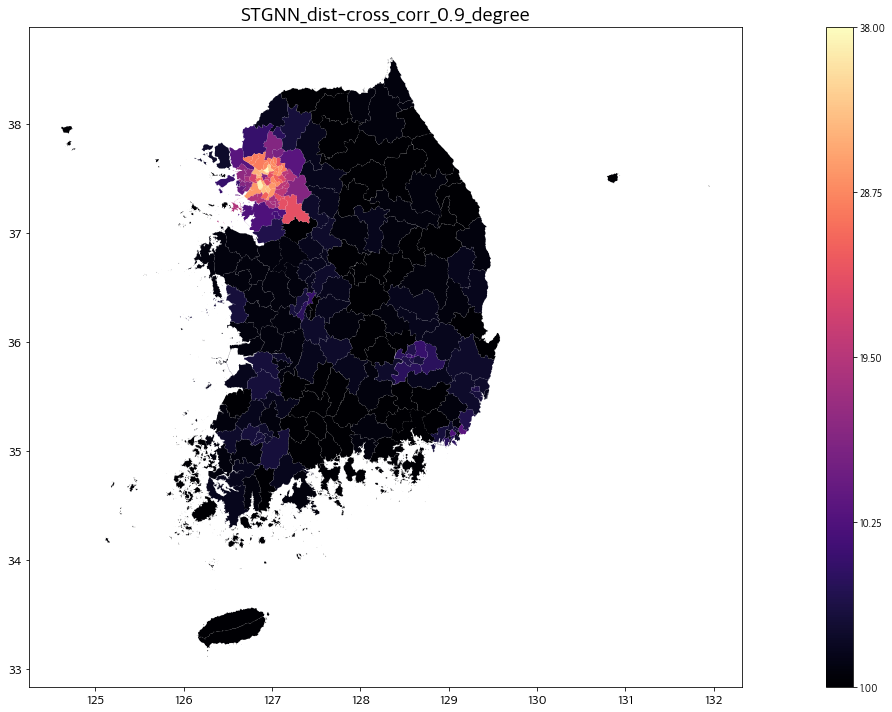

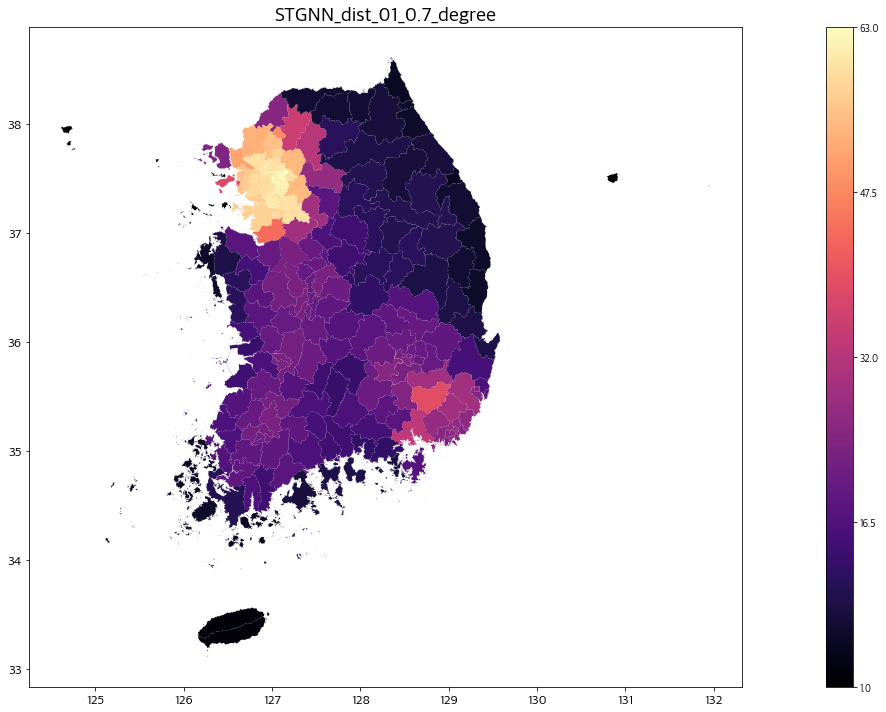

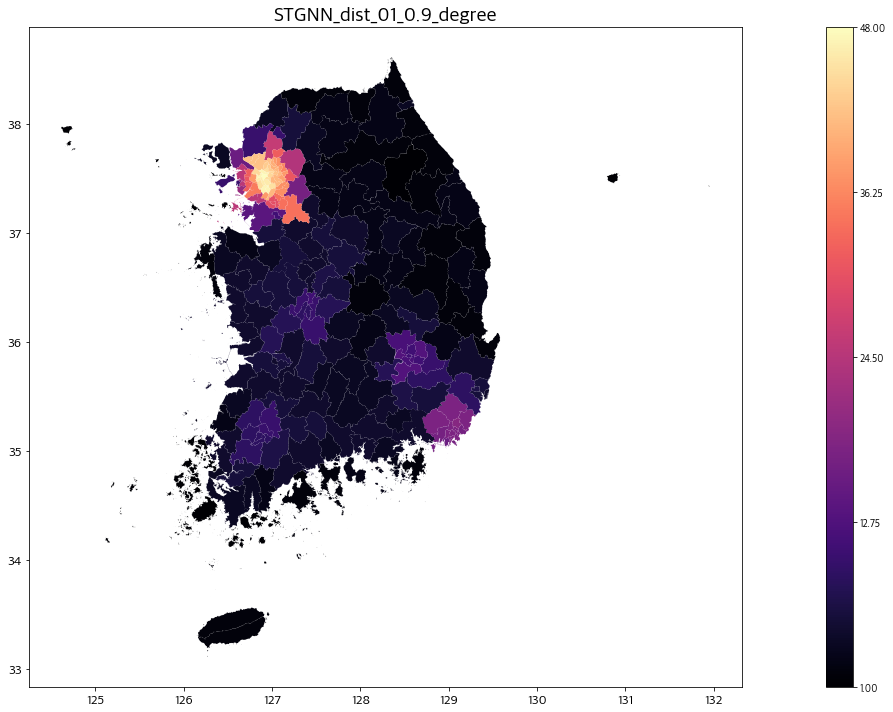

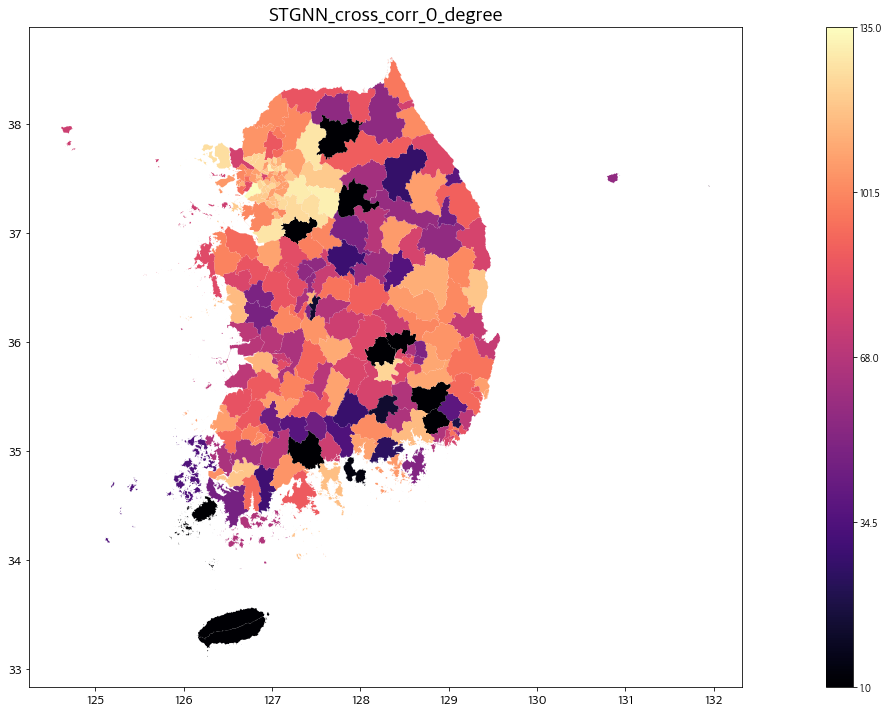

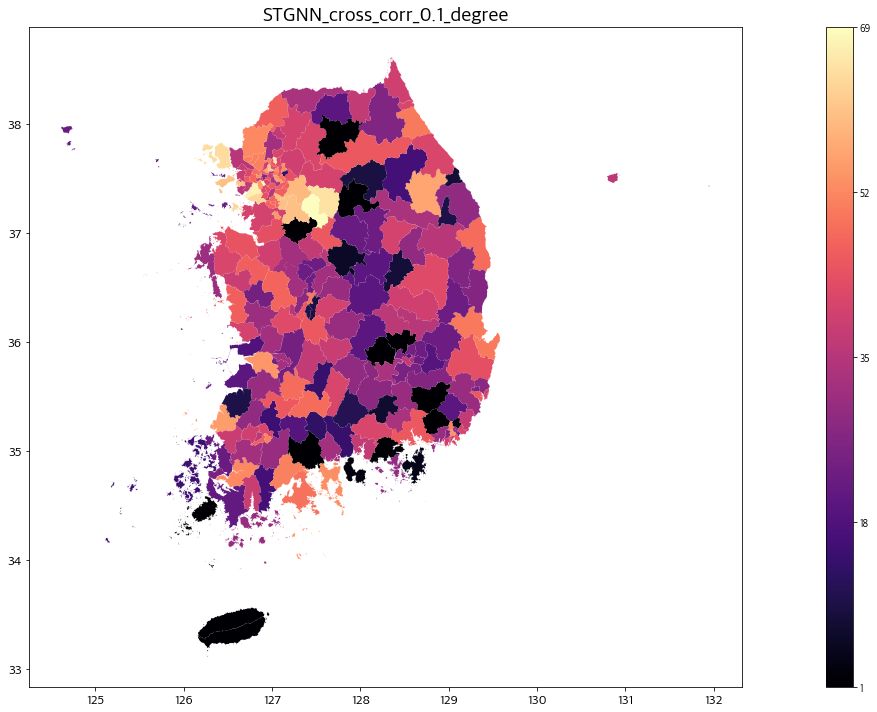

In [30]:
BASEPATH = '/Users/jeonjunhwi/문서/Projects/Master_GNN/Code/Result/summary'
MODEL = 'STGNN'
# graph_type = 'dist_01'
region_type = 'city'
data_type = 'degree' # metric, diameter, degree
# col_name = 'degree'
# norm = 0.3
target_date = 'Alpha1128' # Delta0630, Omicron1130 Alpha1128
target_duration = 'pred_one_month' # pred_two_week, pred_one_week
name = 'smoothing3_cross_corr'
network_dict = dict({'dist-cross_corr' : [0.7, 0.9],
                     'dist_01' : [0.7, 0.9],
                     'cross_corr' : [0, 0.1]
                    #  'dist_01' : [0.9],
                    #  'dist_02' : [1],
                    #  'complete' : [0]
                     })

for name2 in ['1hop', '1hop_int', '2hop', '2hop_int']:
    for graph_type in network_dict.keys():
        for norm in network_dict[graph_type]:
            # Network Diameter
            # metric = pd.read_csv(BASEPATH + f'/{target_date}/{target_duration}/{MODEL}_{region_type}/{name}_{name2}/{MODEL}_{graph_type}_{region_type}_{norm}_{data_type}.csv', encoding='cp949', index_col=0) # degree : region, metric : 0, diameter : SGG_NM
            
            # degree
            metric = pd.read_csv(BASEPATH + f'/{target_date}/{target_duration}/{MODEL}_{region_type}/{name}_{name2}/{graph_type}_{region_type}_{norm}_{data_type}.csv', encoding='cp949', index_col='region') # degree : region, metric : 0, diameter : SGG_NM
            del metric['Unnamed: 0']
            
            for col_name in metric.columns:

                # 딕셔너리로 저장된, 제외된 지역에 enc_list와 같은 metric 할당
                for idx_region in gdf_tmp.index:
                    if idx_region in region_dict.keys():
                        gdf_tmp.loc[idx_region,col_name] = metric.loc[region_dict[idx_region],col_name]
                    else:
                        gdf_tmp.loc[idx_region,col_name] = metric.loc[idx_region,col_name]
                        
                        
                maxv, minv = max(gdf_tmp[col_name]), min(gdf_tmp[col_name])

                fig, ax = plt.subplots(figsize=(15,10))

                plt.title(f"{MODEL}_{graph_type}_{norm}_{col_name}", fontsize=20)
                plt.xticks(fontsize=13)
                plt.yticks(fontsize=13)

                divider = make_axes_locatable(ax)

                # create `cax` for the colorbar
                cax = divider.append_axes("right", size="3%", pad=0.01)

                # plot the geodataframe specifying the axes `ax` and `cax` 
                gdf_tmp.plot(column=col_name, cmap='magma', legend=True, \
                            vmin=minv, vmax=maxv, ax=ax, cax=cax)

                # manipulate the colorbar `cax`
                # cax.set_ylabel(col_name, rotation=90, fontsize=20)
                # set `fontsize` on the colorbar `cax`
                # cax.set_yticklabels(np.linspace(minv, maxv, 5), fontsize = 18)
                # cax.set_yticklabels(np.linspace(0, 1, 5), fontsize = 18)

                cax.set_yticks(np.linspace(minv, maxv, 5), fontsize=20)
                # cax.set_yticklabels(cax.get_yticks(), fontsize = 18)
                # print(minv, maxv)
                plt.tight_layout()

                # plt.show()
                plt.savefig(BASEPATH + f'/{target_date}/{target_duration}/{MODEL}_{region_type}/{graph_type}_{region_type}_{norm}_{col_name}.png')
                # print(BASEPATH + f'/{target_date}/{target_duration}/{MODEL}_{region_type}/{graph_type}_{region_type}_{norm}_{col_name}.png')

In [131]:

reg = ['서울',	'부산',	'대구',	'인천',	'광주',	'대전',	'울산',	'세종',	'경기',	'강원',	'충북',	'충남',	'전북',	'전남',	'경북',	'경남',	'제주']
reg = ['충남', '충북']
# cnt = 0
for region in reg:
    cnt = 0
    for j in list(diff_df.columns):
        if j[:2] == region:
            cnt += 1
            print(j)
    print(region, cnt)
print(' ')
# cnt = 0
for region in reg:
    cnt = 0
    for j in list(a):
        if j[:2] == region:
            print(j)
            cnt += 1
    print(region, cnt)
    

충남 예산군
충남 홍성군
충남 청양군
충남 서천군
충남 부여군
충남 금산군
충남 당진시
충남 계룡시
충남 논산시
충남 서산시
충남 아산시
충남 보령시
충남 공주시
충남 태안군
충남 14
충북 천안시
충북 단양군
충북 음성군
충북 괴산군
충북 진천군
충북 증평군
충북 영동군
충북 옥천군
충북 보은군
충북 제천시
충북 충주시
충북 청주시
충북 서원구
충북 13
 
충남 천안시
충남 아산시
충남 공주시
충남 서산시
충남 부여군
충남 홍성군
충남 당진시
충남 서천군
충남 논산시
충남 계룡시
충남 금산군
충남 태안군
충남 보령시
충남 청양군
충남 예산군
충남 15
충북 증평군
충북 청주시
충북 음성군
충북 충주시
충북 괴산군
충북 단양군
충북 진천군
충북 옥천군
충북 영동군
충북 제천시
충북 보은군
충북 11


In [96]:
# 빈 데이터프레임 정의
distances_kr_metro_city = pd.DataFrame(columns=['from', 'to', 'cost'])

# 지역 인덱스, 컬럼 정의
index = diff_df.index
col = diff_df.columns

city_dict = {}
to_list = []
from_list = []
cost_list = []
for idx, region in enumerate(col):
    
    # 딕셔너리로 지역, 숫자 저장
    city_dict[region] = idx
    
    # to, from, cost 저장
    cost_list += diff_df.iloc[idx:,idx].tolist()
    to_list += index[idx:].to_list()
    from_list += [col[idx] for i in range(len(index[idx:]))]

print(len(cost_list), len(from_list), len(to_list))

# 데이터프레임 컬럼에 할당
distances_kr_metro_city['from'] = from_list
distances_kr_metro_city['to'] = to_list
distances_kr_metro_city['cost'] = cost_list

# 한글 지명을 숫자로 변경
for region in col:
    distances_kr_metro_city.replace(region, city_dict[region], inplace=True)

# csv로 저장
distances_kr_metro_city.to_csv('/Users/jeonjunhwi/문서/Projects/Master_GNN/stgcn_wave/data/sensor_graph/distances_kr_metro_city.csv', encoding='cp949')


# distance를 위도경도 말고 다른 Crs로 바꿔서 해볼것

2211 2211 2211


In [256]:
import numpy as np
import pandas as pd
a = pd.DataFrame({'a' : [1,2,3],
                  'b' : [1, np.nan, np.nan]})

<AxesSubplot:>

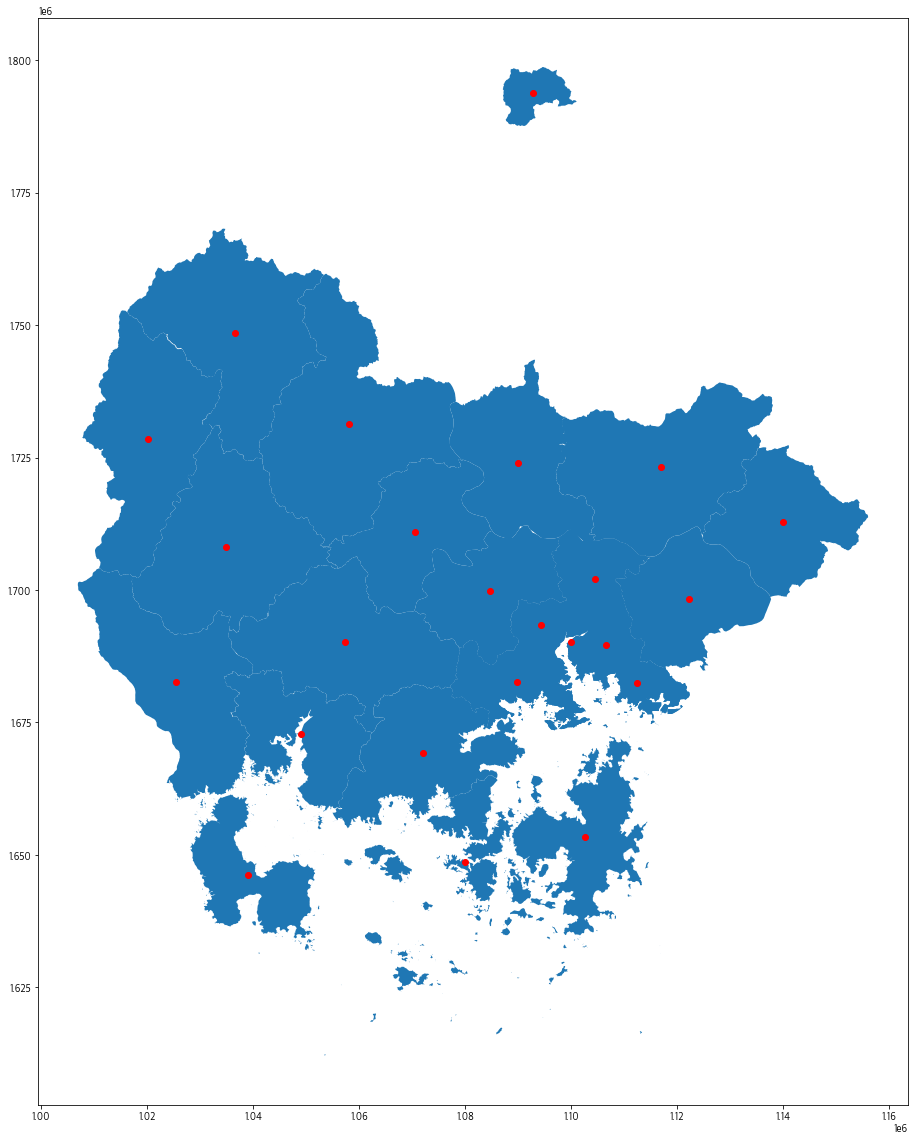

In [73]:
gg = gpd.read_file('LARD_ADM_SECT_SGG_경남/LARD_ADM_SECT_SGG_48.shp', encoding='cp949')
gg['centroid'] = gg.centroid

fig, ax = plt.subplots(figsize=(20,20))
gg['geometry'].plot(ax = ax)
gg['centroid'].plot(ax = ax, color = 'red')

In [32]:
# 좌표계(Coordinate Refference System) 변경 -> 위도, 경도 기준으로 바뀜.
lon_lat_gg = gg.to_crs(4326)
lon_lat_gg['longitude'] = lon_lat_gg.centroid.x  
lon_lat_gg['latitude'] = lon_lat_gg.centroid.y
lon_lat_gg['centroid2'] = lon_lat_gg.centroid

/var/folders/ds/r5c30pq90cvc_pl2xn1337r40000gn/T/ipykernel_7258/4023410774.py:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nc_counties['longitude'] = nc_counties.centroid.x
/var/folders/ds/r5c30pq90cvc_pl2xn1337r40000gn/T/ipykernel_7258/4023410774.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nc_counties['latitude'] = nc_counties.centroid.y
/var/folders/ds/r5c30pq90cvc_pl2xn1337r40000gn/T/ipykernel_7258/4023410774.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  nc_counties['centroid2'] = nc_counties.centroid


## State Dist Adj Matrix

In [21]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
import pandas as pd
df = pd.read_csv('/Users/jeonjunhwi/문서/Projects/Master_GNN/stgcn_wave/data/sensor_graph/state_location.csv')
df = df.set_index('지역')


전국  17 개 시도


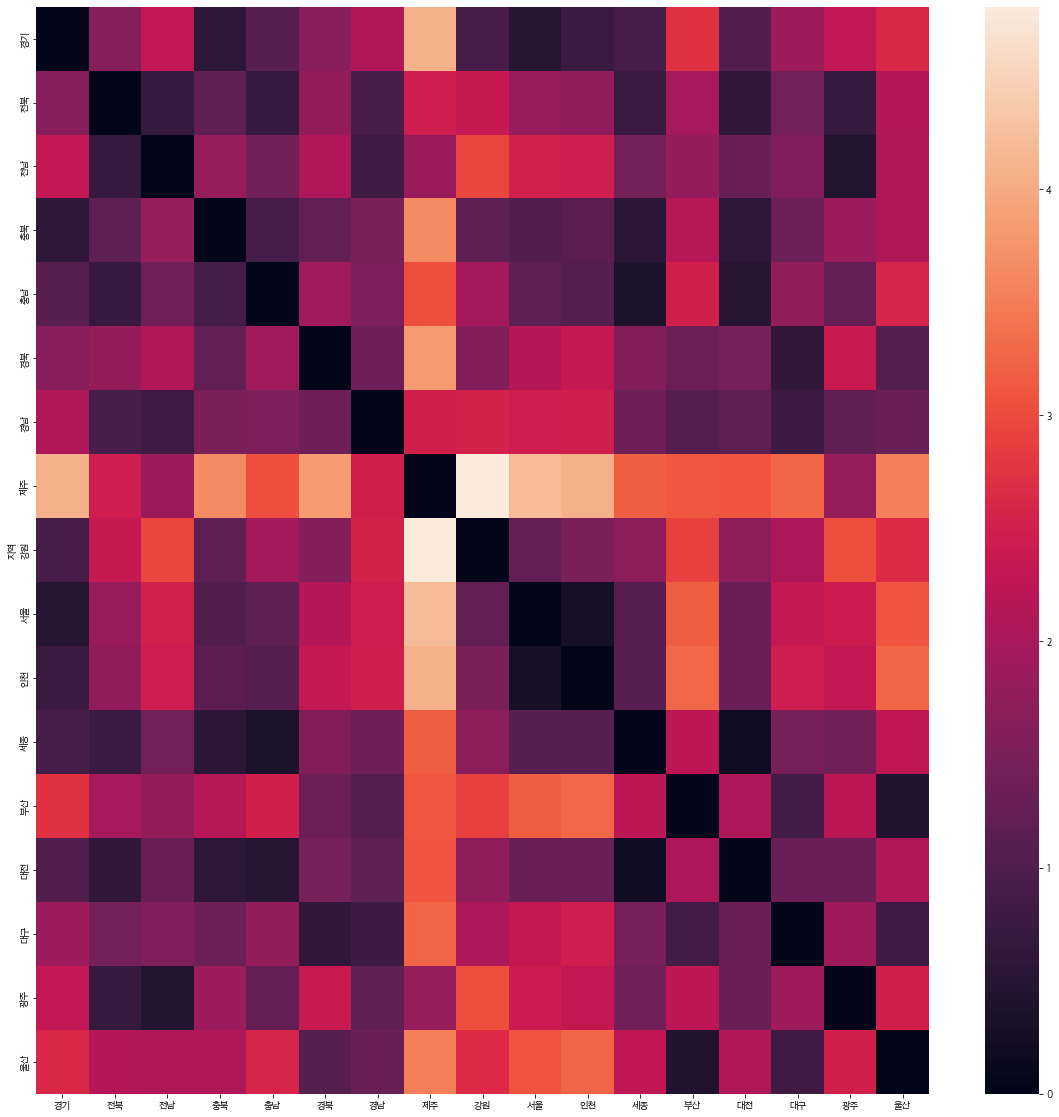

In [24]:
diff_df = pd.DataFrame({})
# 각 지역에 대한 유클리드 거리 계산
for idx, region in enumerate(df.index):
    diff_df[region] = np.sqrt(((df[['latitude', 'longitude']] - df[['latitude', 'longitude']].iloc[idx])**2).sum(axis=1))
    
fig, ax = plt.subplots(figsize=(20,20))
ax = sns.heatmap(diff_df)
print('전국 ', len(diff_df), '개 시도')
plt.show()

In [25]:
diff_df

경기        전북        전남        충북        충남        경북        경남  \
지역                                                                         
경기  0.000000  1.627221  2.296710  0.574033  1.105496  1.647843  2.069440   
전북  1.627221  0.000000  0.694508  1.196218  0.700433  1.797067  0.928919   
전남  2.296710  0.694508  0.000000  1.813968  1.383959  2.080745  0.799294   
충북  0.574033  1.196218  1.813968  0.000000  0.899518  1.203338  1.503918   
충남  1.105496  0.700433  1.383959  0.899518  0.000000  1.929442  1.521231   
경북  1.647843  1.797067  2.080745  1.203338  1.929442  0.000000  1.355586   
경남  2.069440  0.928919  0.799294  1.503918  1.521231  1.355586  0.000000   
제주  4.081395  2.459304  1.848323  3.643872  3.037963  3.845941  2.490399   
강원  0.904068  2.363690  2.966274  1.167495  1.966878  1.579238  2.531009   
서울  0.504737  1.821257  2.515146  1.009889  1.170803  2.147991  2.426814   
인천  0.735461  1.763727  2.455290  1.149396  1.074986  2.333966  2.460585   
세종  0.895638  0.732956  1.413929  0.550023  0.374573  1.563482  1.344309   
부산  2.727145  1.981324  1.788097  2.168742  2.493666  1.316881  1.065706   
대전  1.011813  0.630483  1.285012  0.572434  0.488297  1.446941  1.166706   
대구  1.874306  1.427620  1.545902  1.322438  1.775446  0.624920  0.768518   
광주  2.278407  0.678725  0.445804  1.873968  1.238273  2.370118  1.194275   
울산  2.613995  2.143597  2.074883  2.087436  2.561379  1.053371  1.293762   

          제주        강원        서울        인천        세종        부산        대전  \
지역                                                                         
경기  4.081395  0.904068  0.504737  0.735461  0.895638  2.727145  1.011813   
전북  2.459304  2.363690  1.821257  1.763727  0.732956  1.981324  0.630483   
전남  1.848323  2.966274  2.515146  2.455290  1.413929  1.788097  1.285012   
충북  3.643872  1.167495  1.009889  1.149396  0.550023  2.168742  0.572434   
충남  3.037963  1.966878  1.170803  1.074986  0.374573  2.493666  0.488297   
경북  3.845941  1.579238  2.147991  2.333966  1.563482  1.316881  1.446941   
경남  2.490399  2.531009  2.426814  2.460585  1.344309  1.065706  1.166706   
제주  0.000000  4.806437  4.207659  4.078468  3.186101  3.108381  3.088571   
강원  4.806437  0.000000  1.232017  1.519954  1.681739  2.874570  1.737175   
서울  4.207659  1.232017  0.000000  0.289361  1.119085  3.176792  1.280674   
인천  4.078468  1.519954  0.289361  0.000000  1.118597  3.282384  1.294249   
세종  3.186101  1.681739  1.119085  1.118597  0.000000  2.232079  0.179600   
부산  3.108381  2.874570  3.176792  3.282384  2.232079  0.000000  2.056488   
대전  3.088571  1.737175  1.280674  1.294249  0.179600  2.056488  0.000000   
대구  3.247159  2.062017  2.332325  2.454385  1.462680  0.854691  1.299890   
광주  1.806673  3.041065  2.408793  2.300180  1.385628  2.221437  1.304613   
울산  3.512125  2.632008  3.091979  3.232311  2.256135  0.429305  2.091458   

          대구        광주        울산  
지역                                
경기  1.874306  2.278407  2.613995  
전북  1.427620  0.678725  2.143597  
전남  1.545902  0.445804  2.074883  
충북  1.322438  1.873968  2.087436  
충남  1.775446  1.238273  2.561379  
경북  0.624920  2.370118  1.053371  
경남  0.768518  1.194275  1.293762  
제주  3.247159  1.806673  3.512125  
강원  2.062017  3.041065  2.632008  
서울  2.332325  2.408793  3.091979  
인천  2.454385  2.300180  3.232311  
세종  1.462680  1.385628  2.256135  
부산  0.854691  2.221437  0.429305  
대전  1.299890  1.304613  2.091458  
대구  0.000000  1.893387  0.793925  
광주  1.893387  0.000000  2.486938  
울산  0.793925  2.486938  0.000000

In [27]:
diff_df.to_csv('/Users/jeonjunhwi/문서/Projects/Master_GNN/Code/data/distances_kr_state_adj_mx.csv', encoding='cp949')